<a href="https://colab.research.google.com/github/stejmisailidis/Project-Restaurant-Revenue-Prediction/blob/stejmisailidis-patch-1/Project_Restaurant_Rev_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

<center> <h1> <span style='color:#8A2BE2'> CREWES Data Science Training </span> </h1> </center>

<center> <h2> <span style='color:#7FFFD4'> Restaurant Revenue Prediction  </span> </h2> </center>

---

In this [Jupyter Notebook](https://jupyter.org/install) we will analyze [Restaurant Revenue Prediction](https://www.kaggle.com/competitions/restaurant-revenue-prediction)

## Predicting annual restaurant sales based on objective measurements

TFI has provided a dataset with 137 restaurants in the training set, and a test set of 100000 restaurants. The data columns include the open date, location, city type, and three categories of obfuscated data: Demographic data, Real estate data, and Commercial data. The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. 

### Data fields

* **Id** : Restaurant id. 
* **Open Date** : opening date for a restaurant
* **City** : City that the restaurant is in. Note that there are unicode in the names. 
* **City Group**: Type of the city. Big cities, or Other. 
* **Type**: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile
* **P1, P2 - P37**: There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.
* **Revenue**: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 

#### Loading Data

In [50]:
#Warning and deprecated messages
import warnings
warnings.filterwarnings("ignore")

#Core
import numpy as np
import pandas as pd

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# print plots
%matplotlib inline

# Data pre-processing
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering

# To visualize the elbow curve
from yellowbrick.cluster import kelbow_visualizer

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To compute distances
from scipy.spatial.distance import pdist

# Clustering
from sklearn.datasets import load_wine
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.mixture import GaussianMixture

# Dimensionality reduction
from sklearn.decomposition import PCA

#### Reading Files

In [51]:
df_test = pd.read_csv("test.csv")
df_test

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,01/05/2000,Antalya,Other,FC,5,5.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
99996,99996,07/18/2011,Niğde,Other,IL,1,2.0,4.0,3.0,1,...,1.0,3.0,5,0,0,0,4,0,0,0
99997,99997,12/29/2012,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,...,4.0,1.0,5,5,3,2,4,4,4,2
99998,99998,10/12/2013,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,...,7.5,5.0,0,0,0,4,0,0,0,0


In [52]:
df_test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [53]:
print(df_test.shape)

(100000, 42)


In [54]:
df_train = pd.read_csv("train.csv")
df_train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [55]:
df_train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [56]:
print(df_train.shape)

(137, 43)


#### Checking data types

In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          100000 non-null  int64  
 1   Open Date   100000 non-null  object 
 2   City        100000 non-null  object 
 3   City Group  100000 non-null  object 
 4   Type        100000 non-null  object 
 5   P1          100000 non-null  int64  
 6   P2          100000 non-null  float64
 7   P3          100000 non-null  float64
 8   P4          100000 non-null  float64
 9   P5          100000 non-null  int64  
 10  P6          100000 non-null  int64  
 11  P7          100000 non-null  int64  
 12  P8          100000 non-null  int64  
 13  P9          100000 non-null  int64  
 14  P10         100000 non-null  int64  
 15  P11         100000 non-null  int64  
 16  P12         100000 non-null  int64  
 17  P13         100000 non-null  float64
 18  P14         100000 non-null  int64  
 19  P15

In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

#### Converting date (Object) to date type

In [59]:
df_test["Open Date"] = pd.to_datetime(df_test["Open Date"], format = "%m/%d/%Y" , utc = False)

In [60]:
df_train["Open Date"] = pd.to_datetime(df_train["Open Date"], format = "%m/%d/%Y" , utc = False)

In [61]:
df_test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,2011-01-22,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,2011-03-18,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,2013-10-30,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,2013-05-06,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,2013-07-31,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [62]:
df_train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [63]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Id          100000 non-null  int64         
 1   Open Date   100000 non-null  datetime64[ns]
 2   City        100000 non-null  object        
 3   City Group  100000 non-null  object        
 4   Type        100000 non-null  object        
 5   P1          100000 non-null  int64         
 6   P2          100000 non-null  float64       
 7   P3          100000 non-null  float64       
 8   P4          100000 non-null  float64       
 9   P5          100000 non-null  int64         
 10  P6          100000 non-null  int64         
 11  P7          100000 non-null  int64         
 12  P8          100000 non-null  int64         
 13  P9          100000 non-null  int64         
 14  P10         100000 non-null  int64         
 15  P11         100000 non-null  int64         
 16  P12

In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Id          137 non-null    int64         
 1   Open Date   137 non-null    datetime64[ns]
 2   City        137 non-null    object        
 3   City Group  137 non-null    object        
 4   Type        137 non-null    object        
 5   P1          137 non-null    int64         
 6   P2          137 non-null    float64       
 7   P3          137 non-null    float64       
 8   P4          137 non-null    float64       
 9   P5          137 non-null    int64         
 10  P6          137 non-null    int64         
 11  P7          137 non-null    int64         
 12  P8          137 non-null    int64         
 13  P9          137 non-null    int64         
 14  P10         137 non-null    int64         
 15  P11         137 non-null    int64         
 16  P12         137 non-null  

#### Checking for dulicates rows

In [65]:
df_test.duplicated().sum()

0

In [66]:
df_train.duplicated().sum()

0

#### Checking for missing values

In [67]:
df_test.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
dtype: int64

In [68]:
df_train.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

#### Statistical Description

In [69]:
df_test.describe().T # Statistics of numerical columns

,count,mean,std,min,25%,50%,75%,max
Id,100000.0,49999.500000,28867.657797,0.0,24999.75,49999.5,74999.25,99999.0
P1,100000.0,4.088030,2.812963,1.0,2.00,3.0,4.00,15.0
P2,100000.0,4.428085,1.428865,1.0,3.75,5.0,5.00,7.5
P3,100000.0,4.215325,0.842161,0.0,4.00,4.0,4.00,6.0
P4,100000.0,4.396025,1.035827,2.0,4.00,4.0,5.00,7.5
P5,100000.0,1.989590,1.065314,1.0,1.00,2.0,2.00,6.0
P6,100000.0,2.881900,1.531429,1.0,2.00,2.0,4.00,10.0
P7,100000.0,5.300510,2.178580,1.0,5.00,5.0,5.00,10.0
P8,100000.0,4.931000,1.718490,1.0,4.00,5.0,5.00,10.0
P9,100000.0,5.251380,1.702632,4.0,4.00,5.0,5.00,10.0


In [70]:
df_test.describe(include = "object").T # Statistics of the categorical (object) column

,count,unique,top,freq
City,100000,57,İstanbul,34087
City Group,100000,2,Other,50728
Type,100000,4,FC,57019


In [71]:
df_test.describe(include = "all").T # Numeric and categoric columns

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Id,100000.0,NaN,NaN,NaN,NaT,NaT,49999.5,28867.657797,0.0,24999.75,49999.5,74999.25,99999.0
Open Date,100000,310,2013-07-10 00:00:00,645,1995-05-08,2014-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,100000,57,İstanbul,34087,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City Group,100000,2,Other,50728,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,100000,4,FC,57019,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1,100000.0,NaN,NaN,NaN,NaT,NaT,4.08803,2.812963,1.0,2.0,3.0,4.0,15.0
P2,100000.0,NaN,NaN,NaN,NaT,NaT,4.428085,1.428865,1.0,3.75,5.0,5.0,7.5
P3,100000.0,NaN,NaN,NaN,NaT,NaT,4.215325,0.842161,0.0,4.0,4.0,4.0,6.0
P4,100000.0,NaN,NaN,NaN,NaT,NaT,4.396025,1.035827,2.0,4.0,4.0,5.0,7.5
P5,100000.0,NaN,NaN,NaN,NaT,NaT,1.98959,1.065314,1.0,1.0,2.0,2.0,6.0


* Data goes from 1995-05-08 to 2014-01-04
* Istanbul appears with the most frequency although the city group "other" is the most frequent.

In [72]:
df_train.describe().T 

,count,mean,std,min,25%,50%,75%,max
Id,137.0,6.800000e+01,3.969257e+01,0.0,34.0,68.0,102.0,136.0
P1,137.0,4.014599e+00,2.910391e+00,1.0,2.0,3.0,4.0,12.0
P2,137.0,4.408759e+00,1.514900e+00,1.0,4.0,5.0,5.0,7.5
P3,137.0,4.317518e+00,1.032337e+00,0.0,4.0,4.0,5.0,7.5
P4,137.0,4.372263e+00,1.016462e+00,3.0,4.0,4.0,5.0,7.5
P5,137.0,2.007299e+00,1.209620e+00,1.0,1.0,2.0,2.0,8.0
P6,137.0,3.357664e+00,2.134235e+00,1.0,2.0,3.0,4.0,10.0
P7,137.0,5.423358e+00,2.296809e+00,1.0,5.0,5.0,5.0,10.0
P8,137.0,5.153285e+00,1.858567e+00,1.0,4.0,5.0,5.0,10.0
P9,137.0,5.445255e+00,1.834793e+00,4.0,4.0,5.0,5.0,10.0


In [73]:
df_train.describe(include = "object").T

,count,unique,top,freq
City,137,34,İstanbul,50
City Group,137,2,Big Cities,78
Type,137,3,FC,76


In [74]:
df_train.describe(include = "all").T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Id,137.0,NaN,NaN,NaN,NaT,NaT,68.0,39.692569,0.0,34.0,68.0,102.0,136.0
Open Date,137,134,2010-02-23 00:00:00,2,1996-05-08,2014-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,137,34,İstanbul,50,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City Group,137,2,Big Cities,78,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,137,3,FC,76,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1,137.0,NaN,NaN,NaN,NaT,NaT,4.014599,2.910391,1.0,2.0,3.0,4.0,12.0
P2,137.0,NaN,NaN,NaN,NaT,NaT,4.408759,1.5149,1.0,4.0,5.0,5.0,7.5
P3,137.0,NaN,NaN,NaN,NaT,NaT,4.317518,1.032337,0.0,4.0,4.0,5.0,7.5
P4,137.0,NaN,NaN,NaN,NaT,NaT,4.372263,1.016462,3.0,4.0,4.0,5.0,7.5
P5,137.0,NaN,NaN,NaN,NaT,NaT,2.007299,1.20962,1.0,1.0,2.0,2.0,8.0


* Data goes from 1996-05-08 to 2014-01-25
* Istanbul appears with the most frequency and also the city group "Big cities".

# EDA

### Univariate Analysis

In [75]:
# Extracting names of numerical and categorical features
cols_num = list(df_train.drop(columns = ["revenue"]).select_dtypes(include = ["int64", "float64"]))
cols_cat = list(df_train.drop(columns = ["revenue"]).select_dtypes(include = ["object", "category", "bool"]))

print("Numerical columns:", cols_num)
print("Categorical columns:", cols_cat)

Numerical columns: ['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37']
Categorical columns: ['City', 'City Group', 'Type']


In [76]:
def hist_box(data, feature, figsize=(12, 7), drop = -99999):

    # Subplot canvas
    fig, (ax_box, ax_hist) = plt.subplots(nrows = 2, sharex = True, gridspec_kw = {"height_ratios": (0.25, 0.75)}, figsize = figsize)

    # Boxplot on top
    sns.boxplot(data = data[data[feature] != drop], x = feature, ax = ax_box, showmeans = True, color = "pink")  # boxplot will be created and a star will indicate the mean value of the column
    
    # Histogram on bottom
    sns.histplot(data = data[data[feature] != drop], x = feature, ax = ax_hist, kde = True) # histogram will be created and

    # Add mean and median to histogram
    ax_hist.axvline(data[feature][data[feature] != drop].mean(), color = "green") # mean
    ax_hist.axvline(data[feature][data[feature] != drop].median(), color = "orange") # median

    # Title
    fig.suptitle("Distribution of " + feature, fontsize=16)

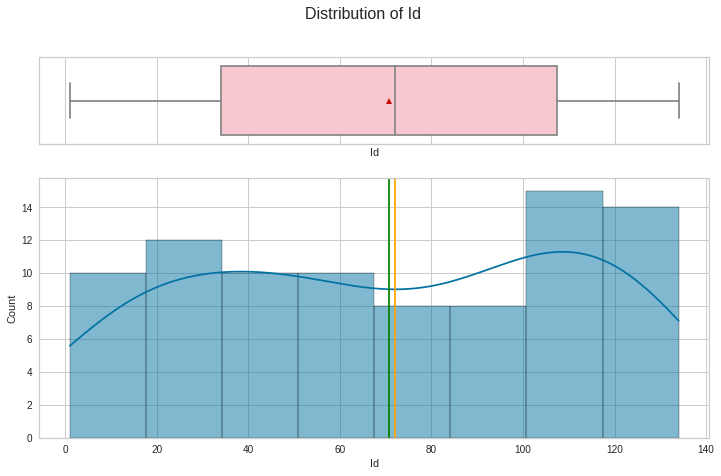

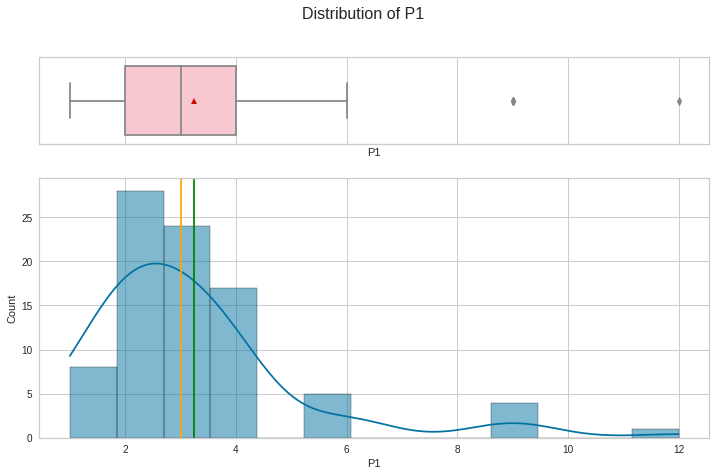

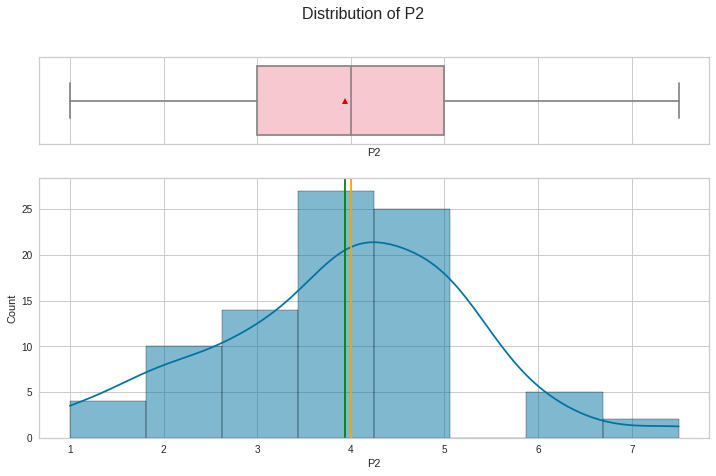

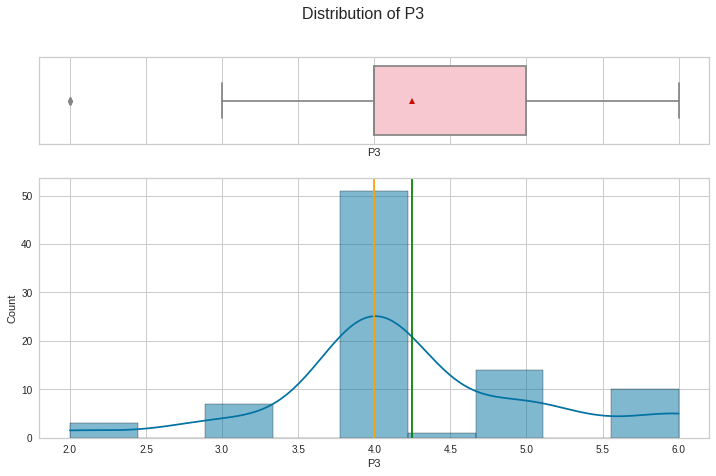

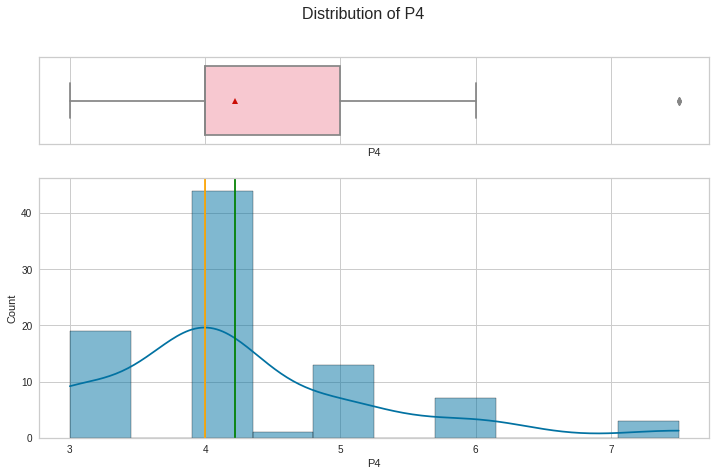

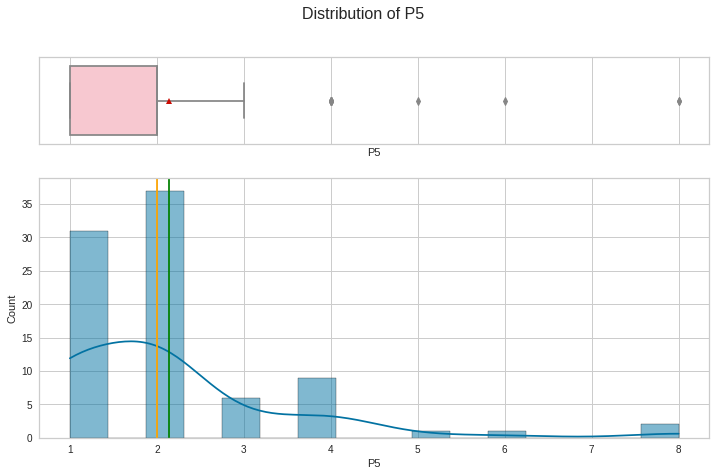

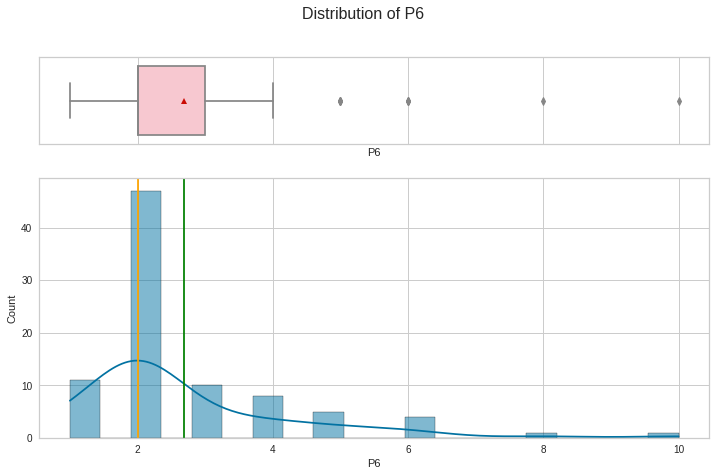

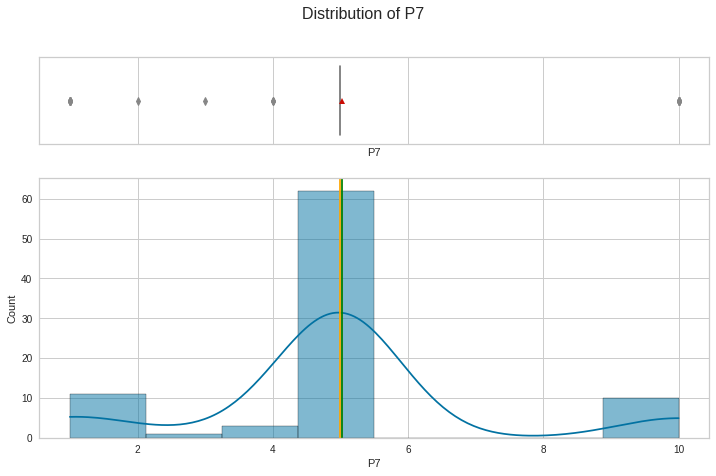

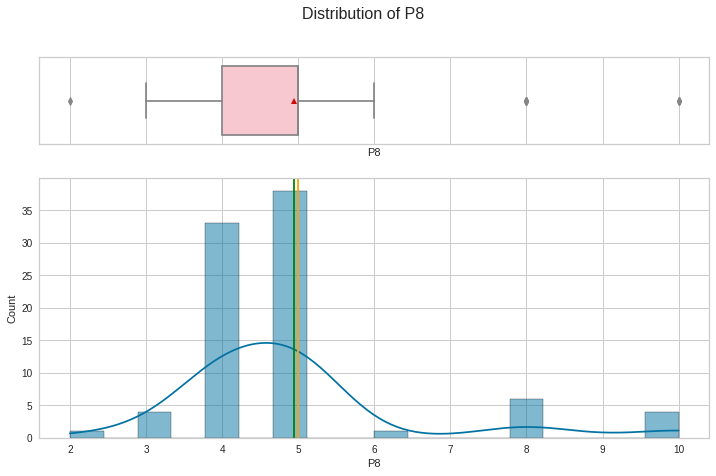

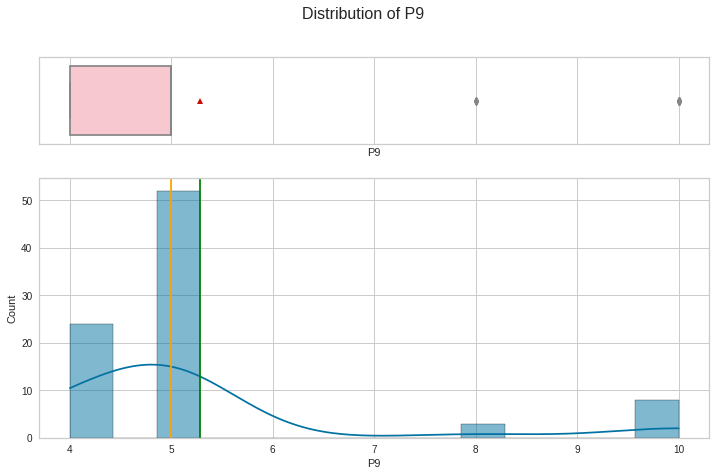

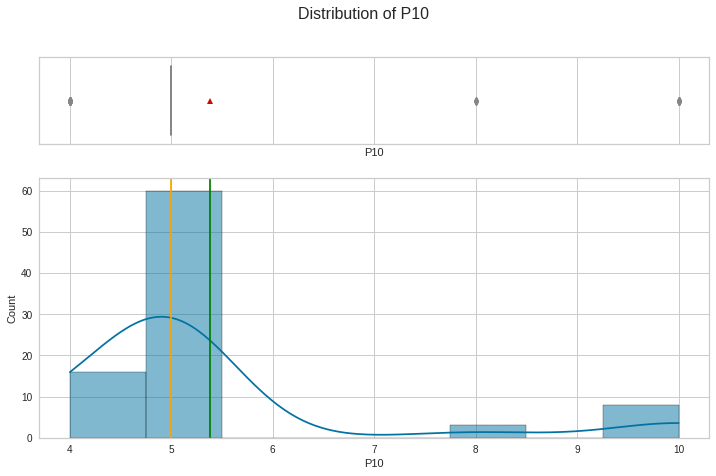

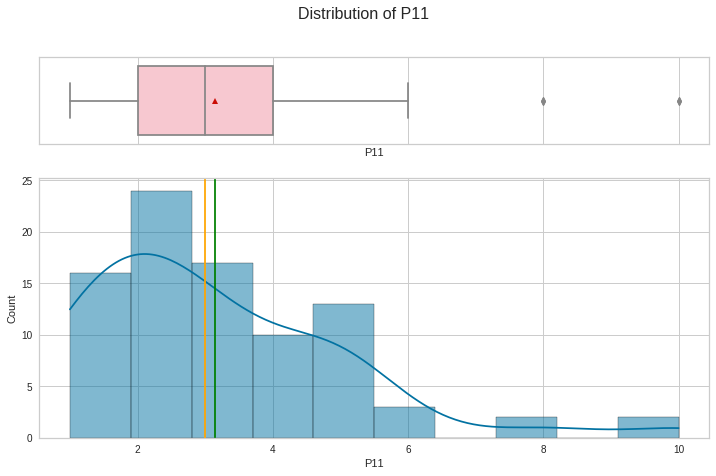

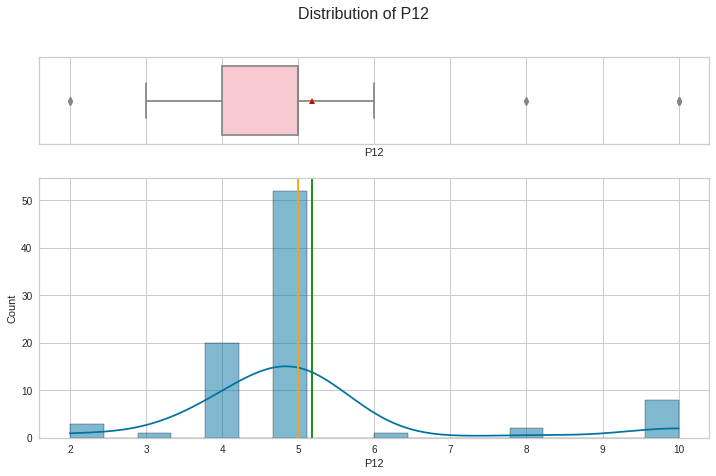

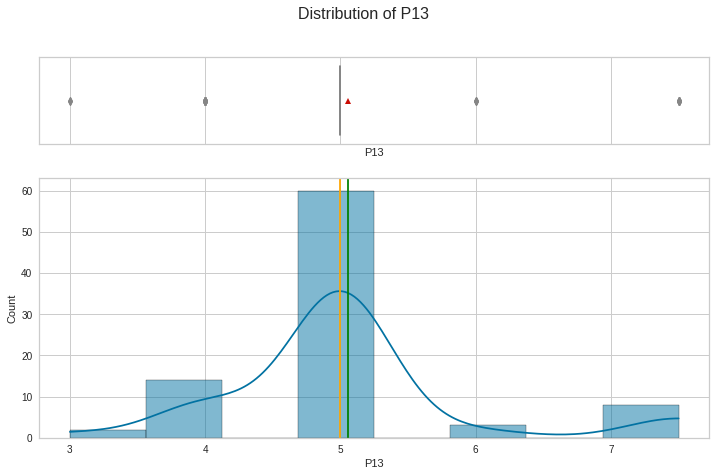

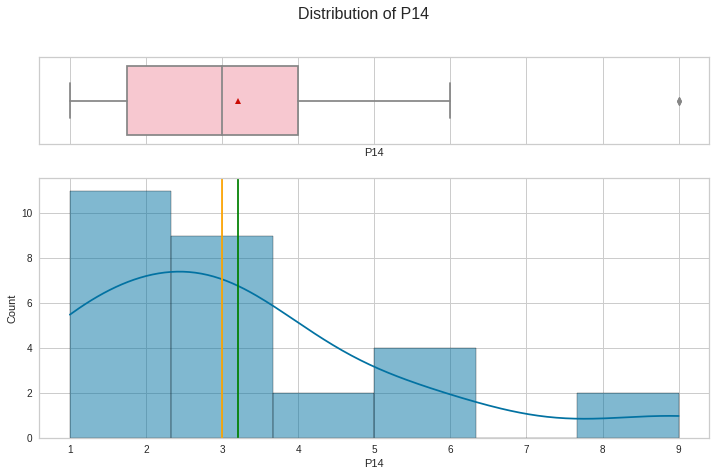

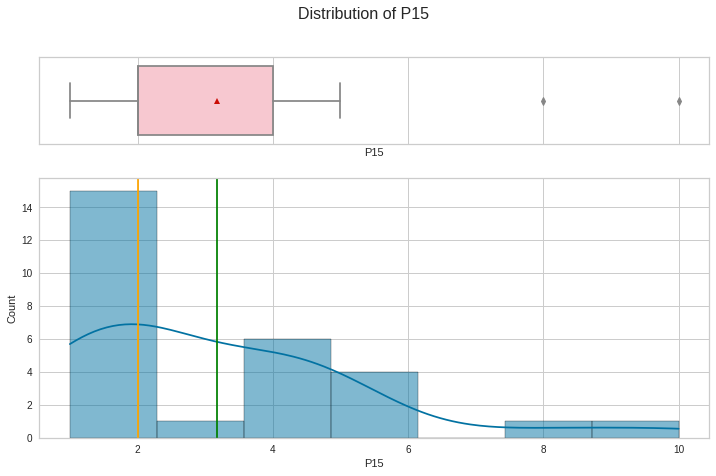

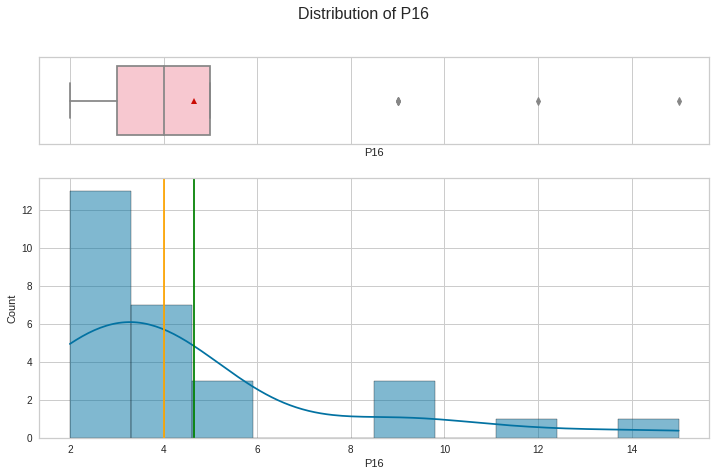

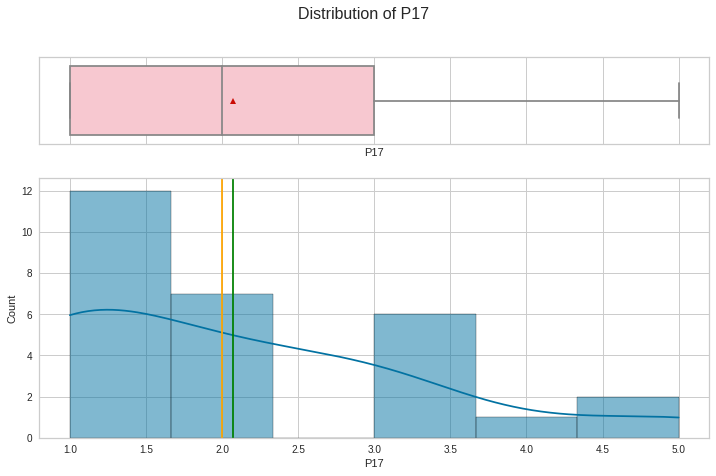

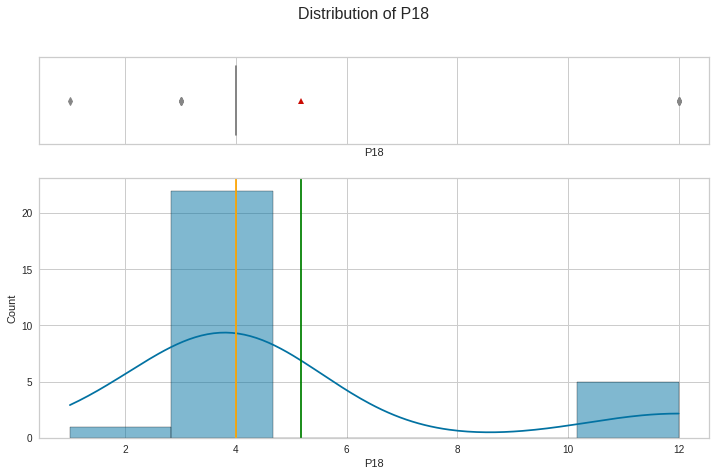

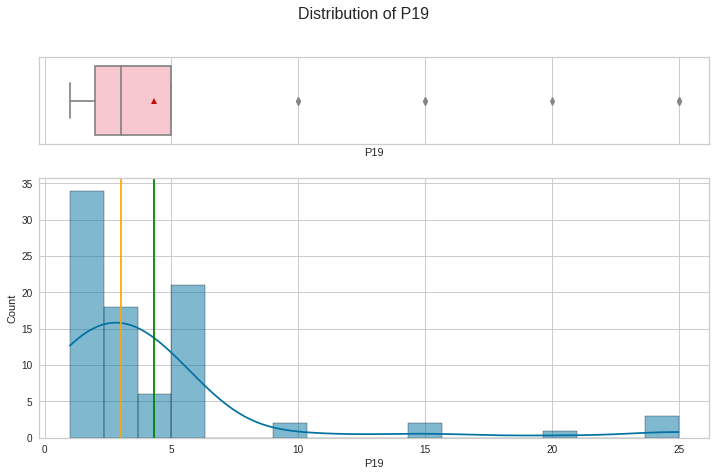

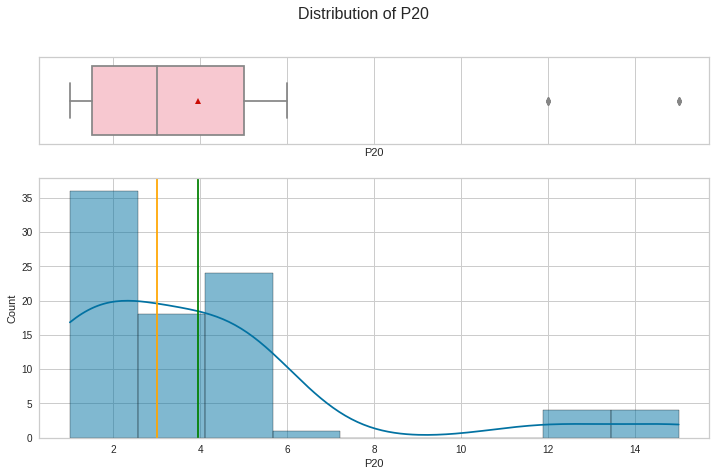

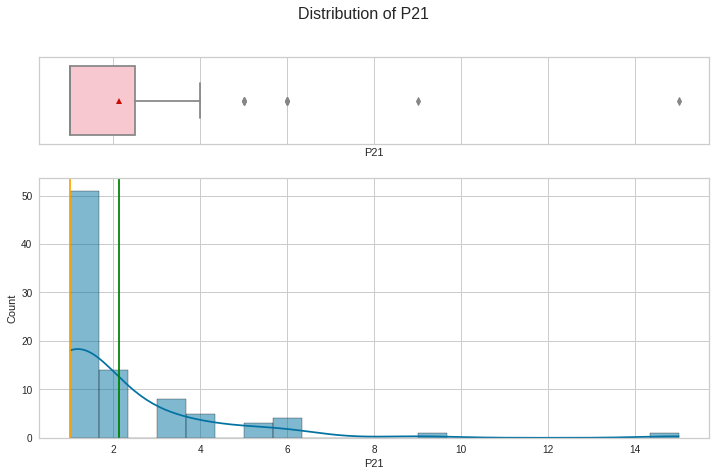

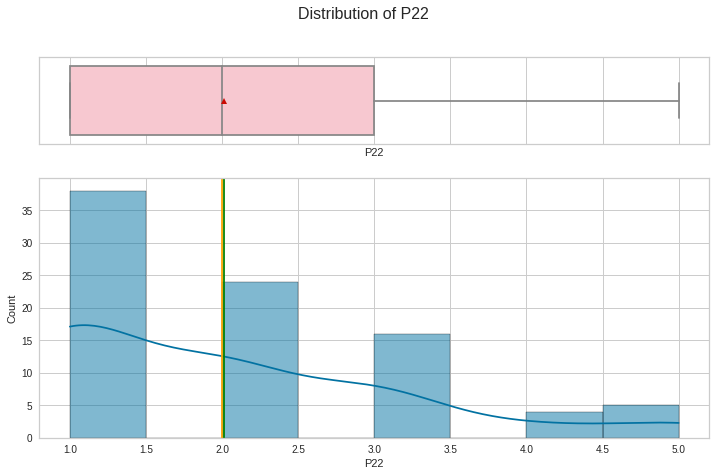

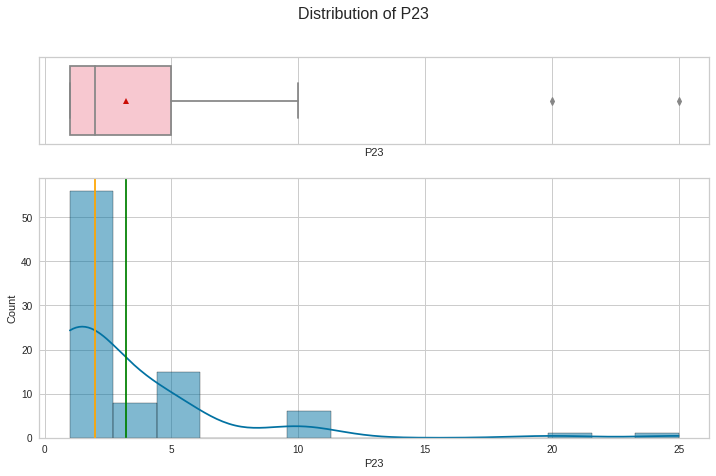

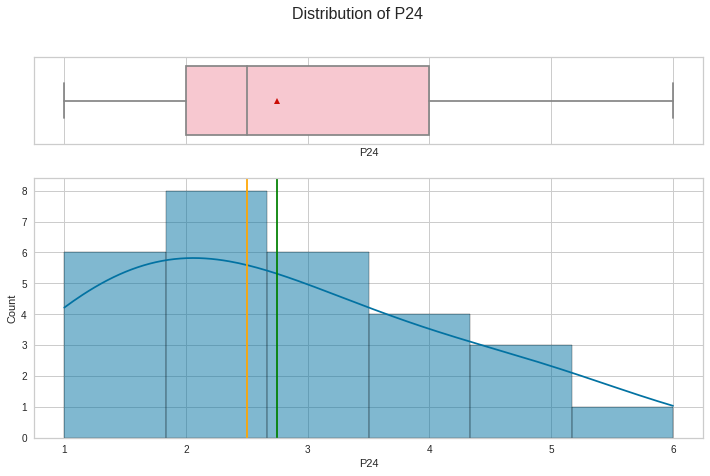

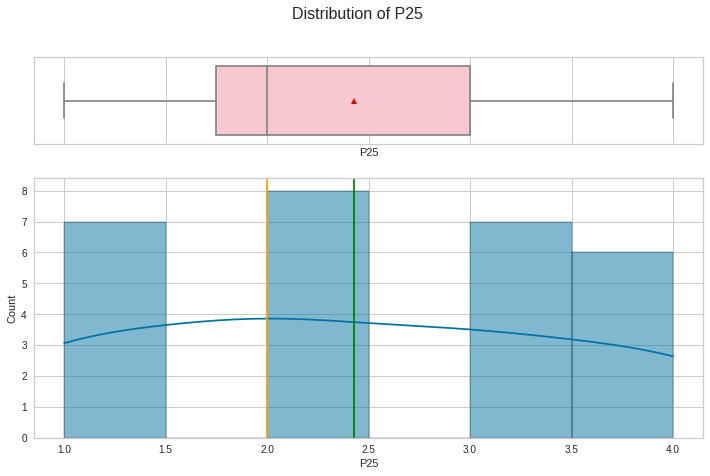

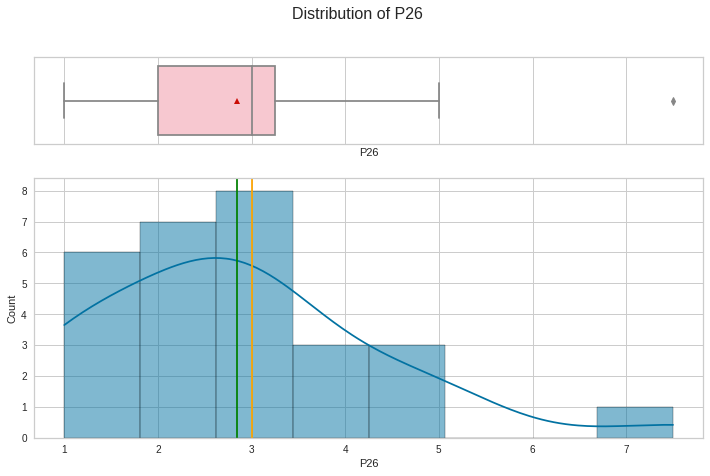

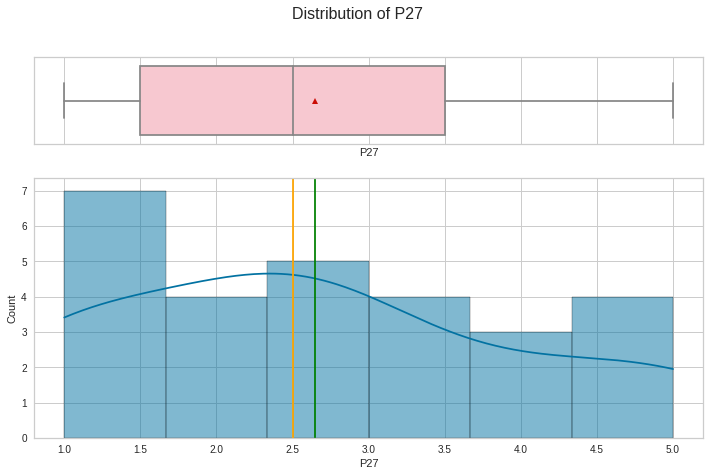

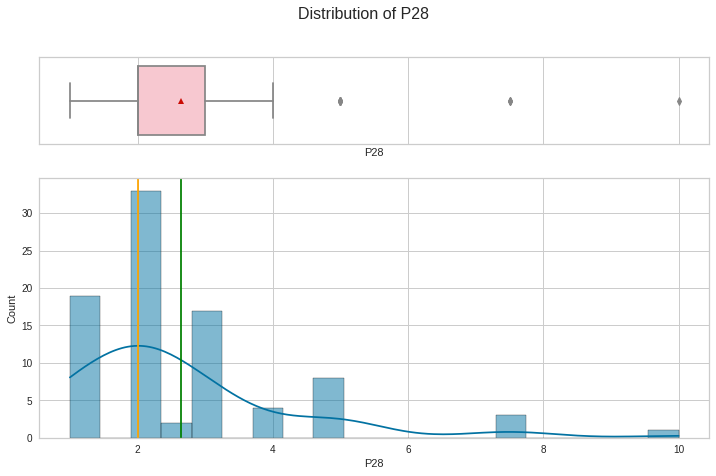

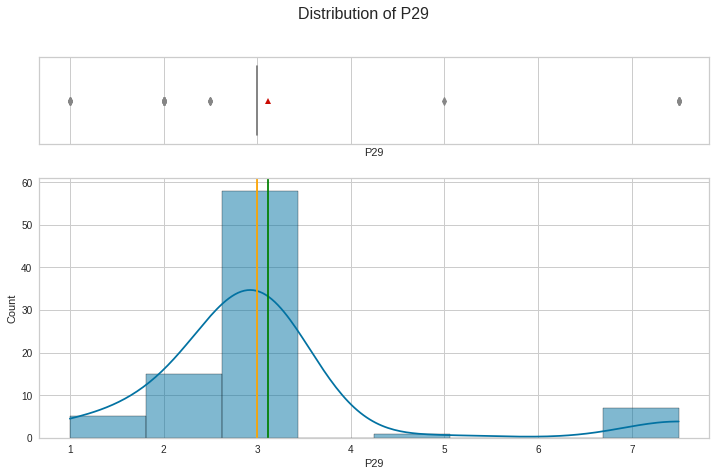

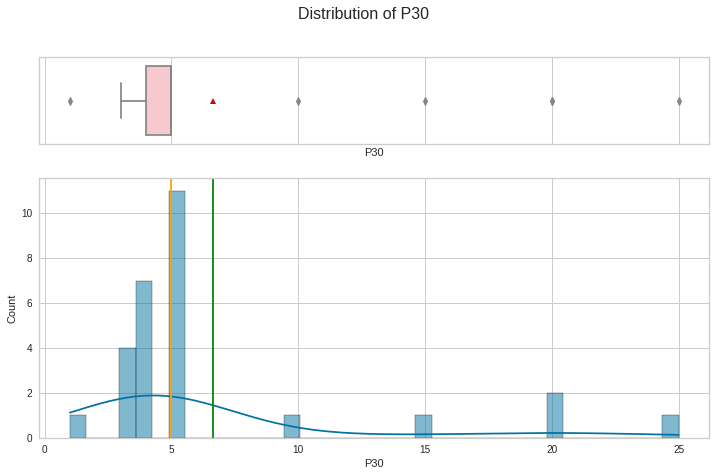

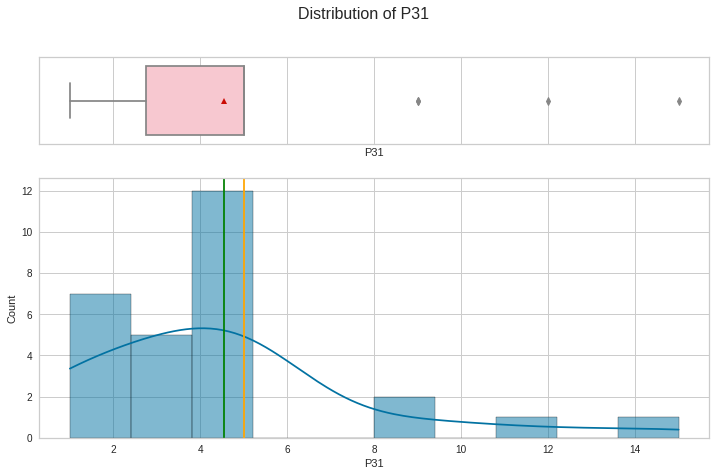

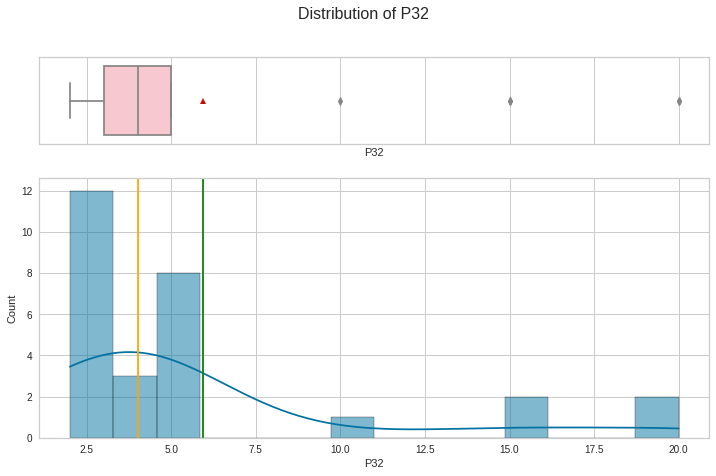

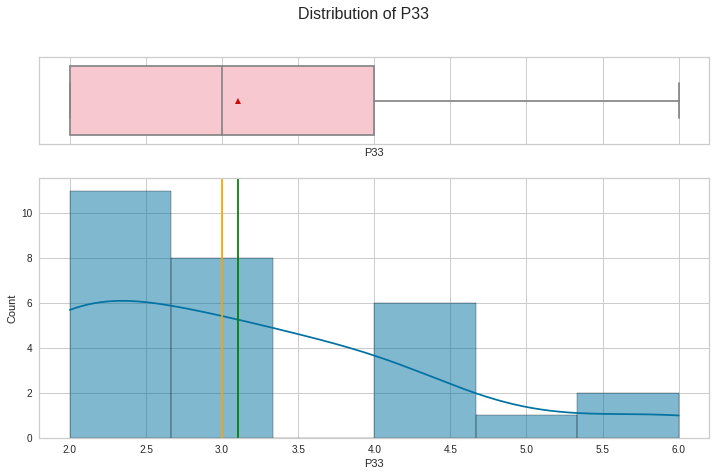

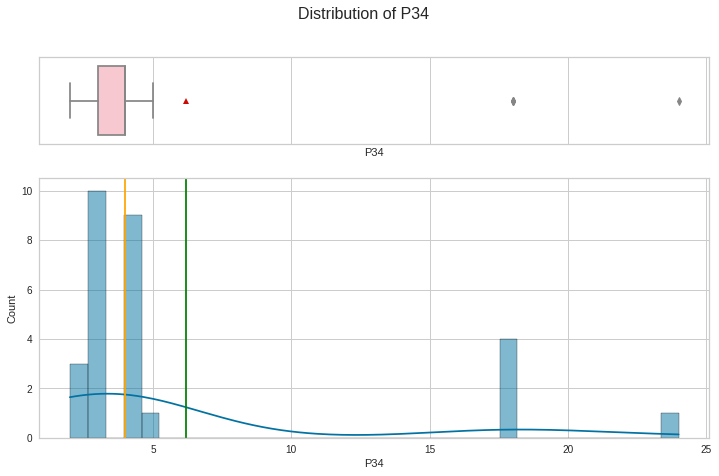

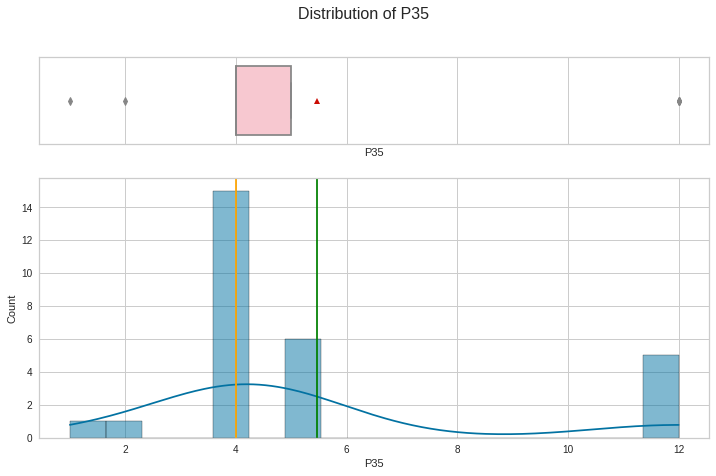

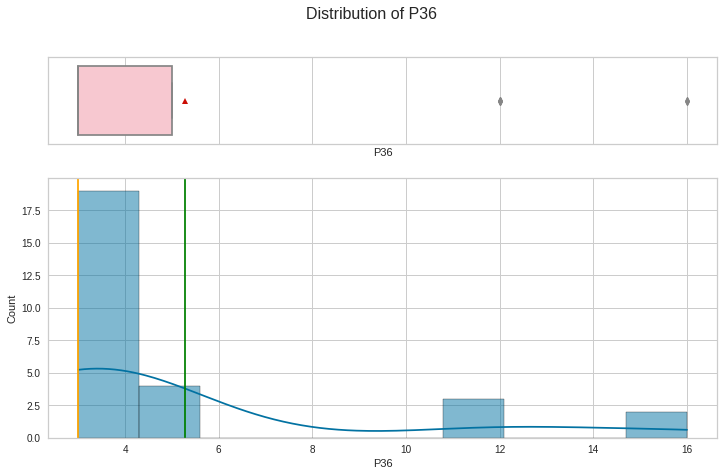

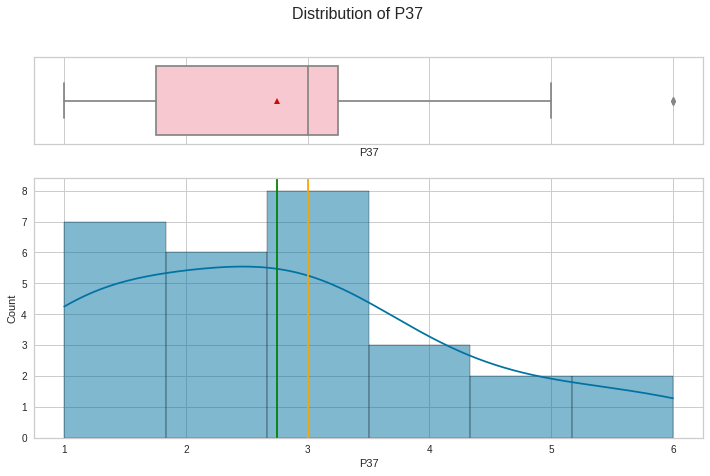

In [77]:
for i in cols_num:
  hist_box(df_train[df_train["City"] != 'İstanbul'],i,drop=0)
  #hist_box(df_train,i)

### Categorical Features

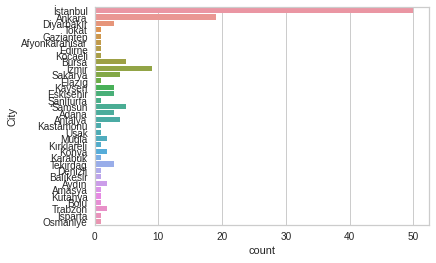

In [78]:
#sns.countplot(data = df_test, y = "City")
sns.countplot(data = df_train, y = "City");

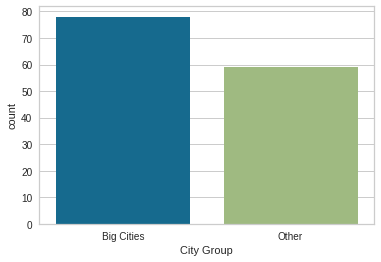

In [79]:
#sns.countplot(data = df_test, x = "City Group")
sns.countplot(data = df_train, x = "City Group");

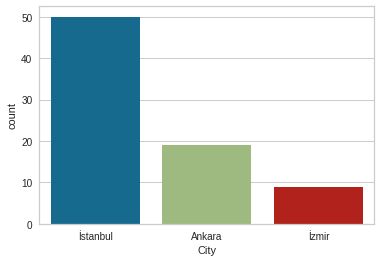

In [80]:
#sns.countplot(data = df_test[df_test["City Group"] == 'Big Cities'], x = "City")
sns.countplot(data = df_train[df_train["City Group"] == 'Big Cities'], x = "City");

In [81]:
#df_test["City"].value_counts() 
df_train["City"].value_counts()

İstanbul          50
Ankara            19
İzmir              9
Bursa              5
Samsun             5
Sakarya            4
Antalya            4
Kayseri            3
Eskişehir          3
Adana              3
Diyarbakır         3
Tekirdağ           3
Muğla              2
Trabzon            2
Aydın              2
Konya              2
Karabük            1
Isparta            1
Bolu               1
Kütahya            1
Amasya             1
Balıkesir          1
Denizli            1
Kocaeli            1
Kırklareli         1
Edirne             1
Uşak               1
Kastamonu          1
Tokat              1
Şanlıurfa          1
Elazığ             1
Gaziantep          1
Afyonkarahisar     1
Osmaniye           1
Name: City, dtype: int64

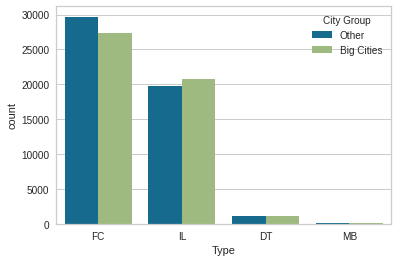

In [82]:
sns.countplot(data = df_test, x = "Type",  hue="City Group")
#sns.countplot(data = df_train, x = "Type",  hue="City Group");

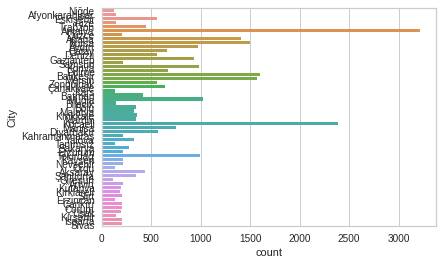

In [83]:
sns.countplot(data = df_test[(df_test["City Group"] == 'Other') & (df_test["Type"] == "FC")], y = "City")
#sns.countplot(data = df_train[(df_train["City Group"] == 'Other') & (df_train["Type"] =

* For the 'City' we can see a big outlier.
* If you check for the Group, you can see the distrution is similar when you group big cities and others.
* The distribution is bigger for Food Court and inline restaurantes.

### Bivariate Analysis

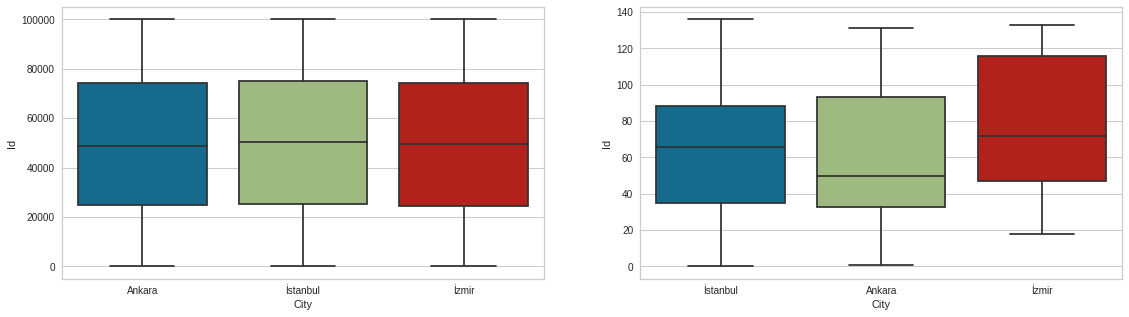

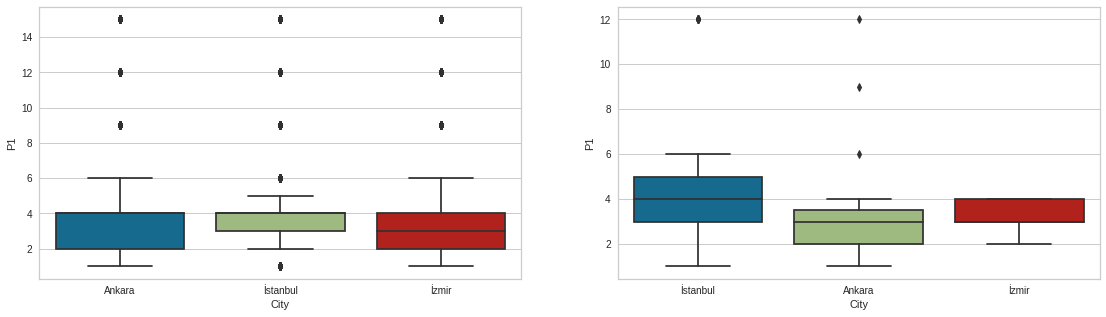

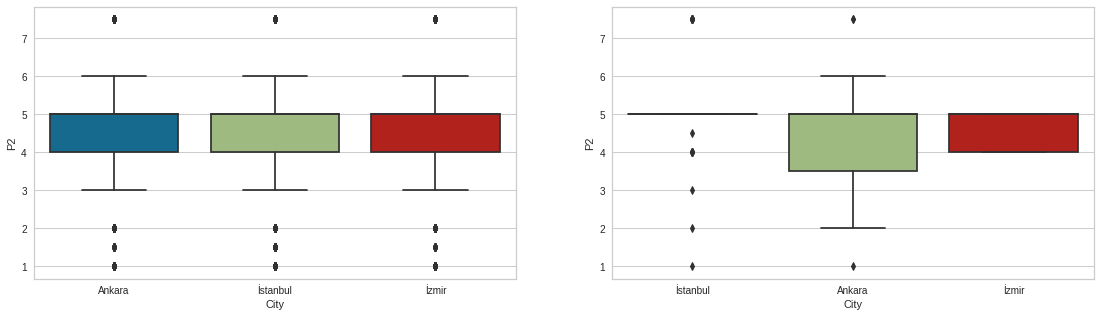

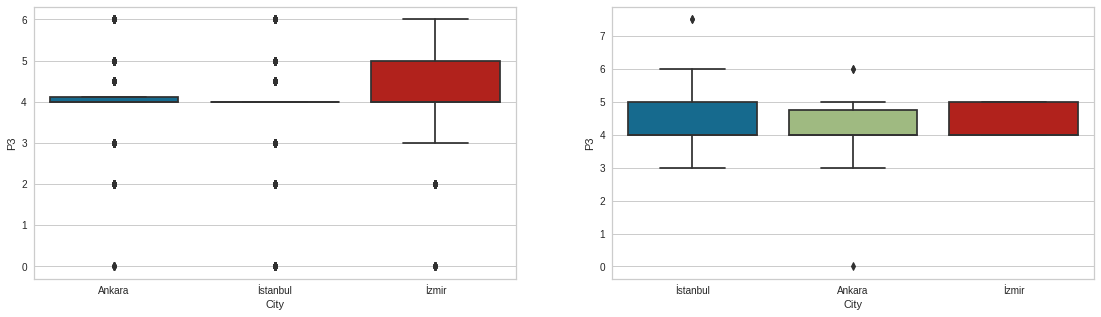

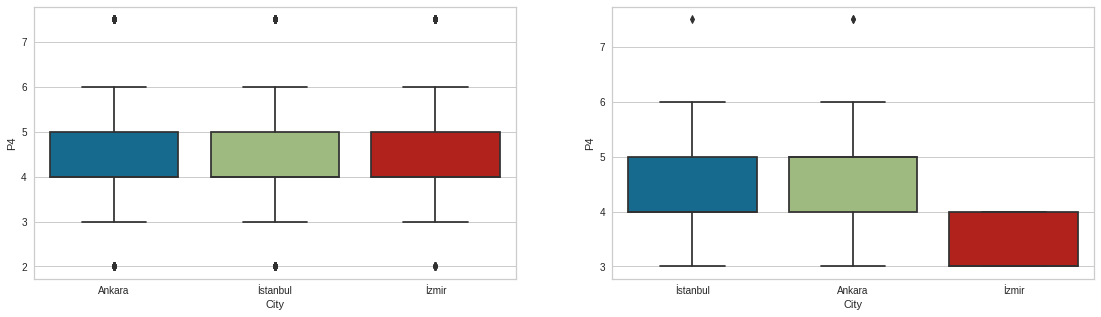

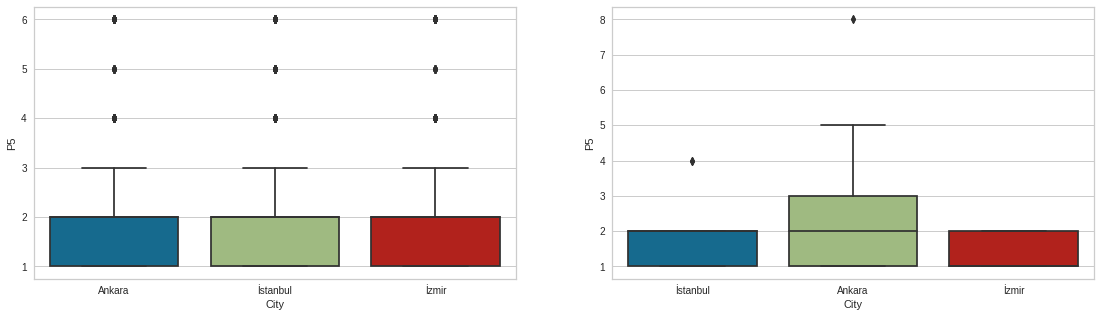

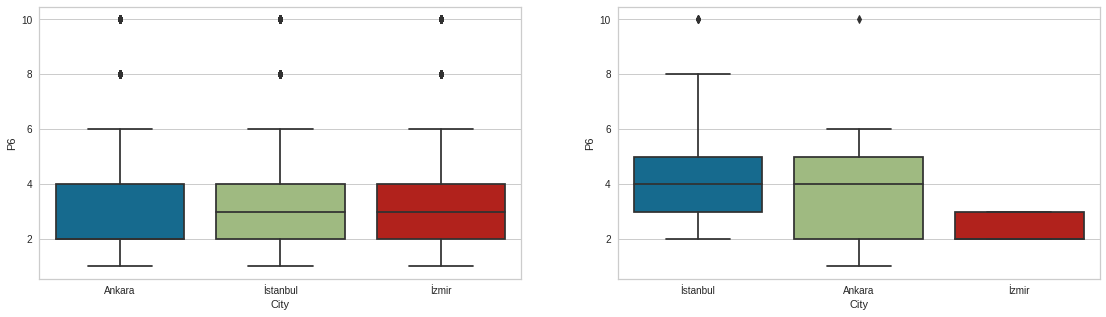

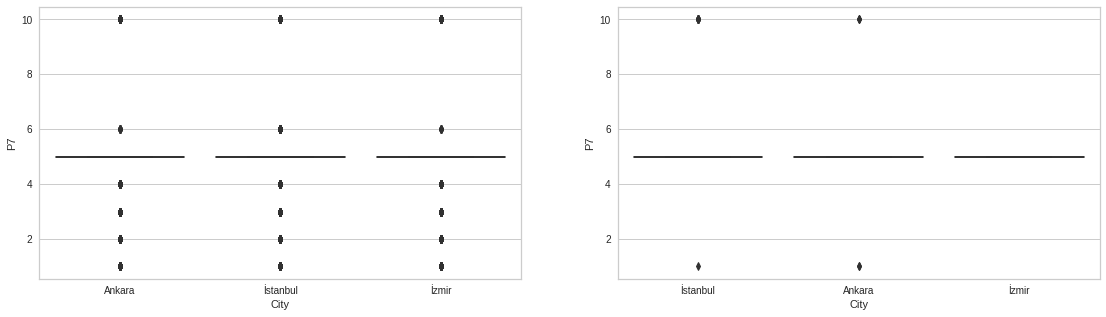

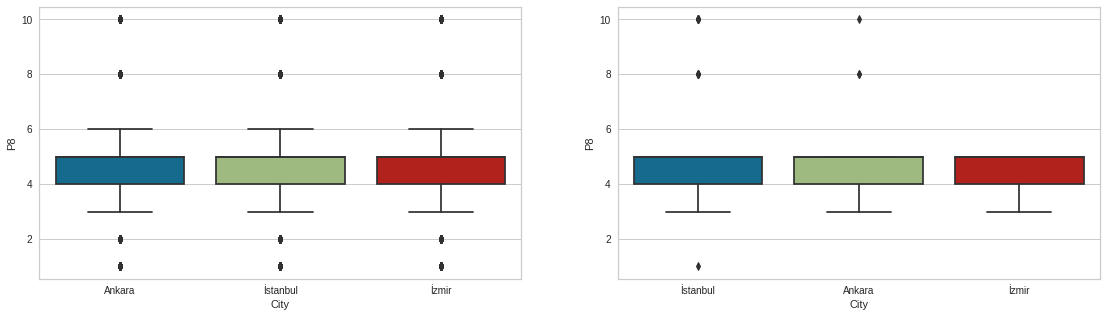

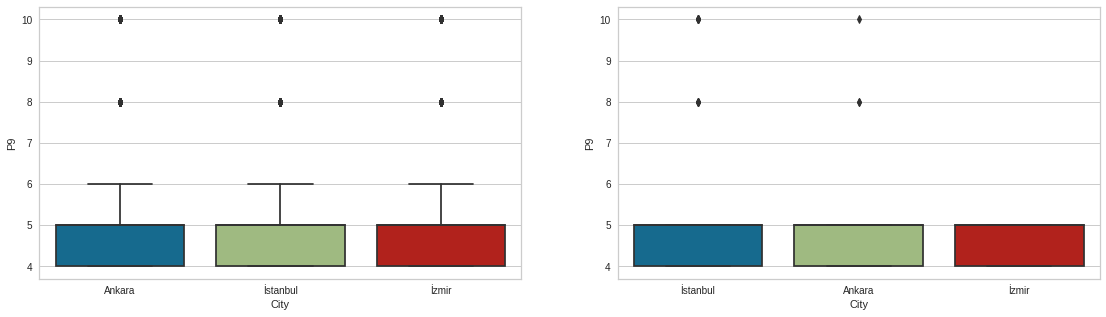

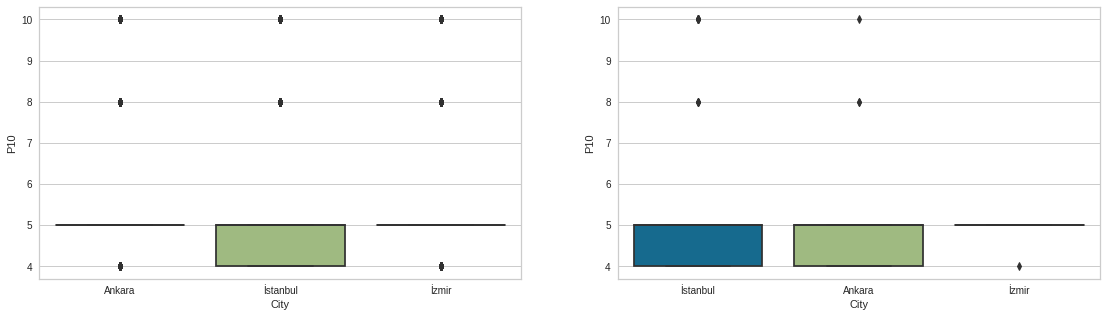

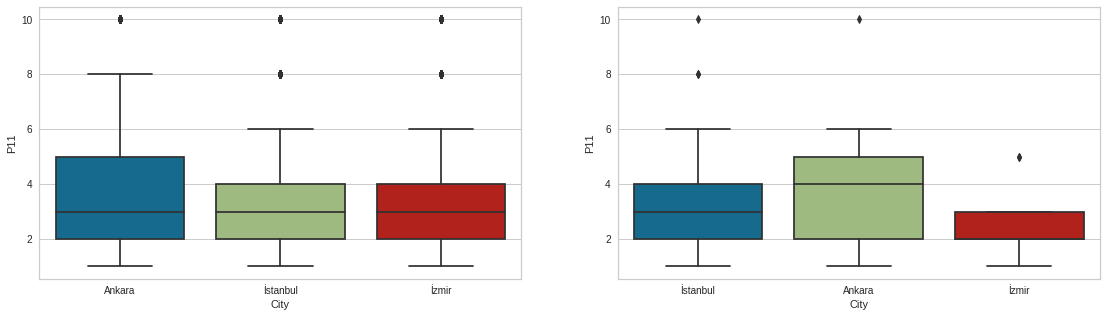

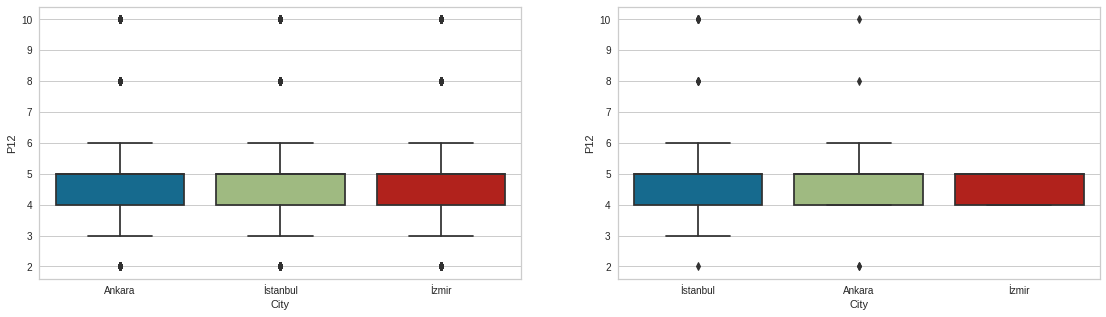

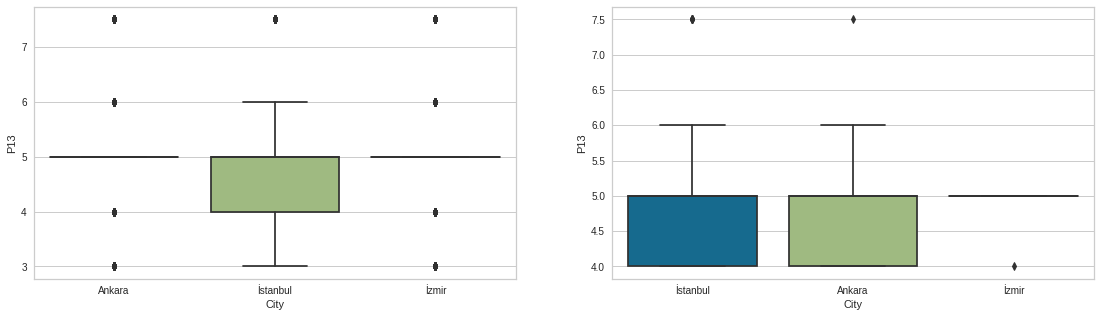

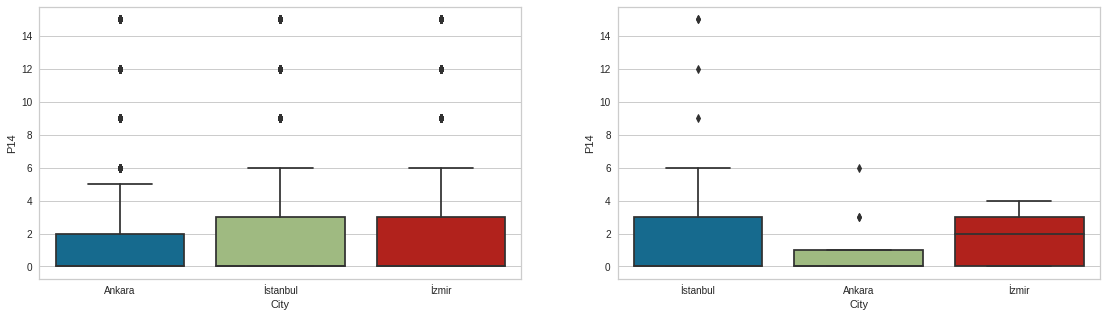

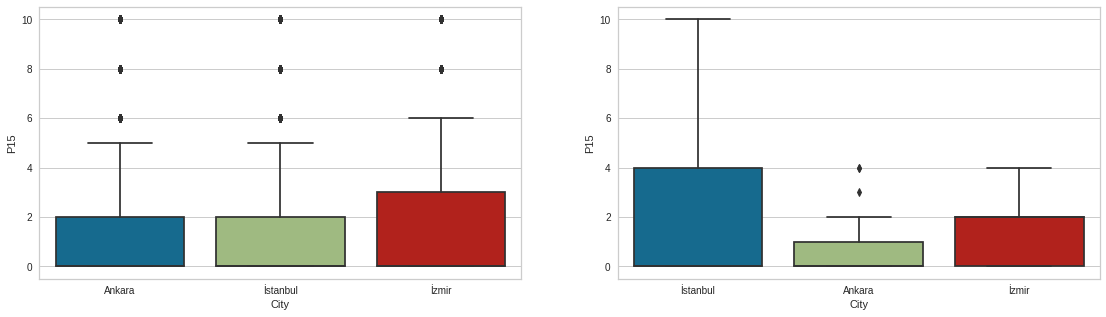

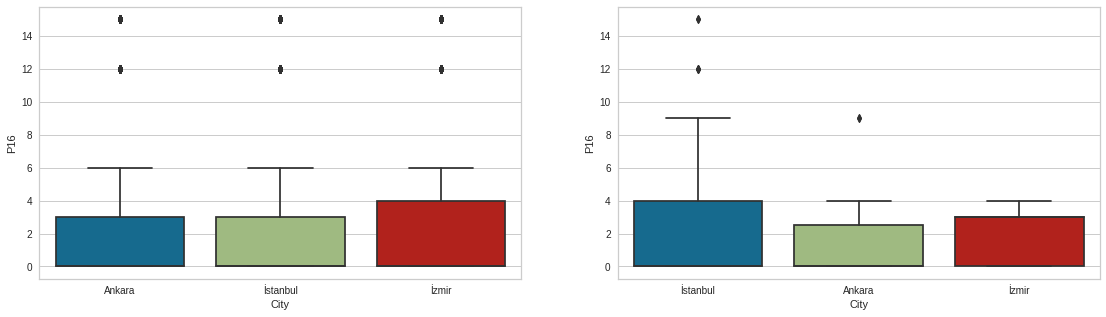

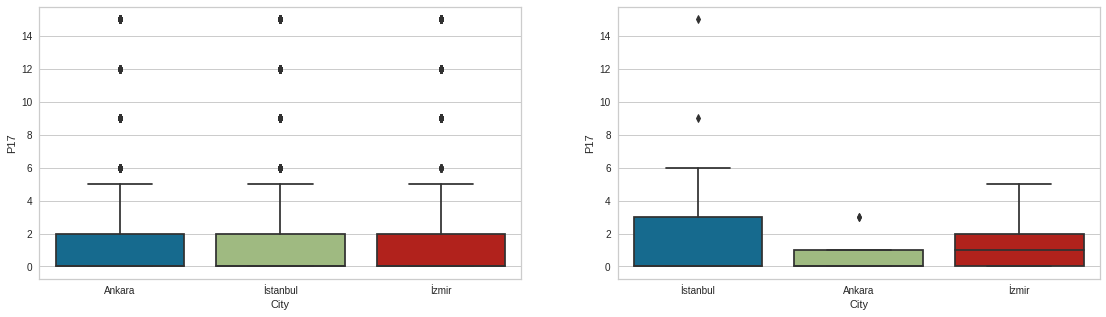

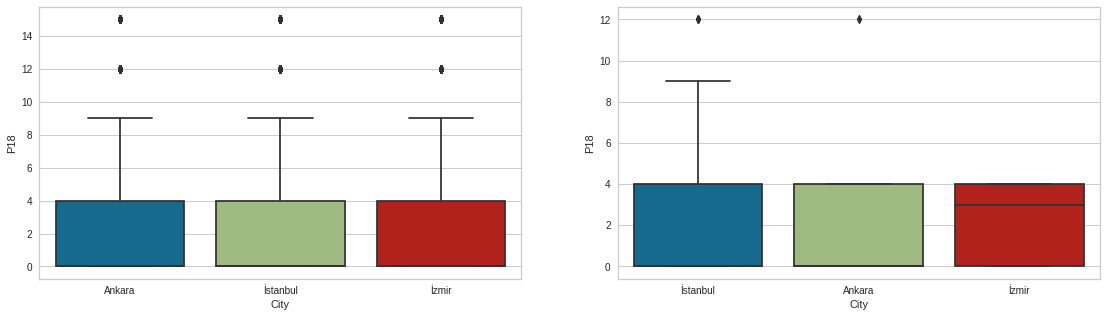

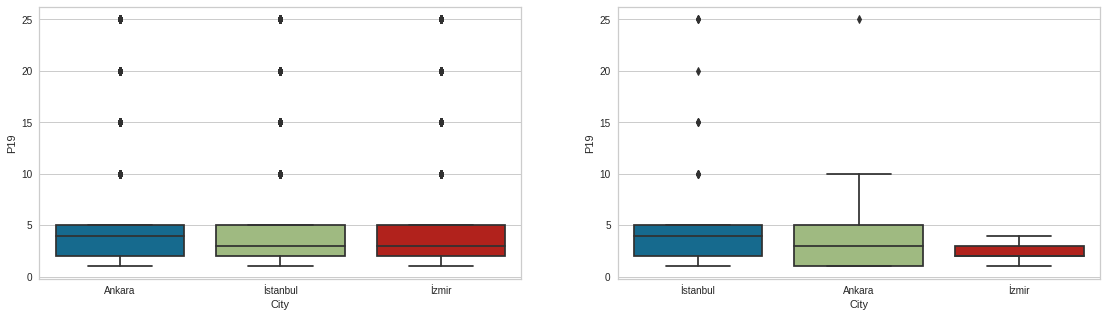

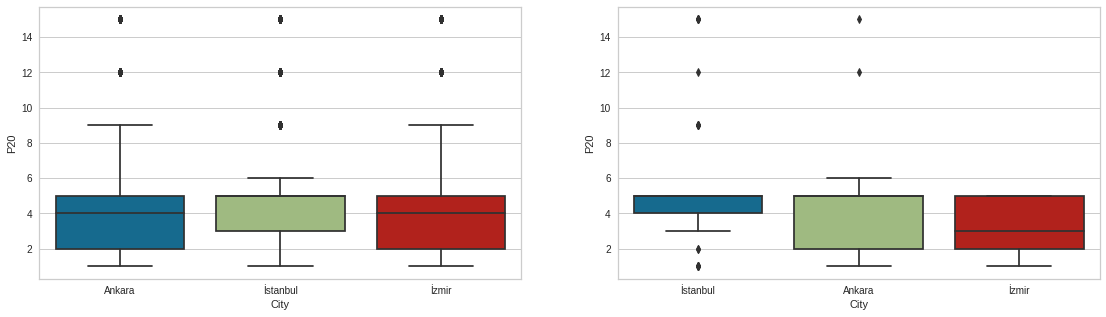

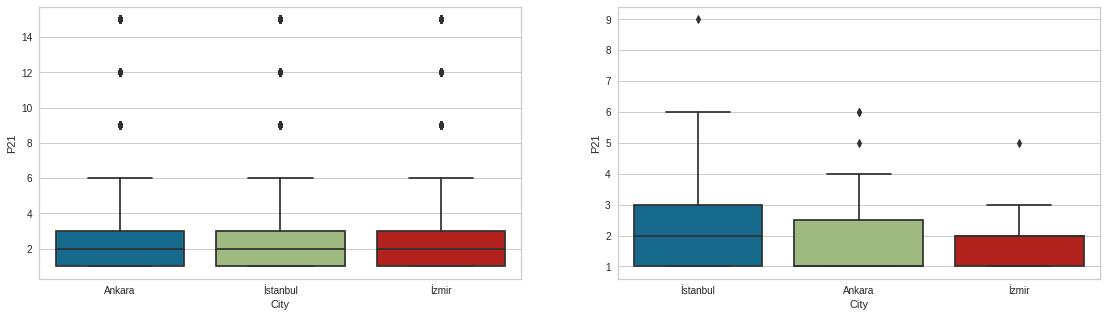

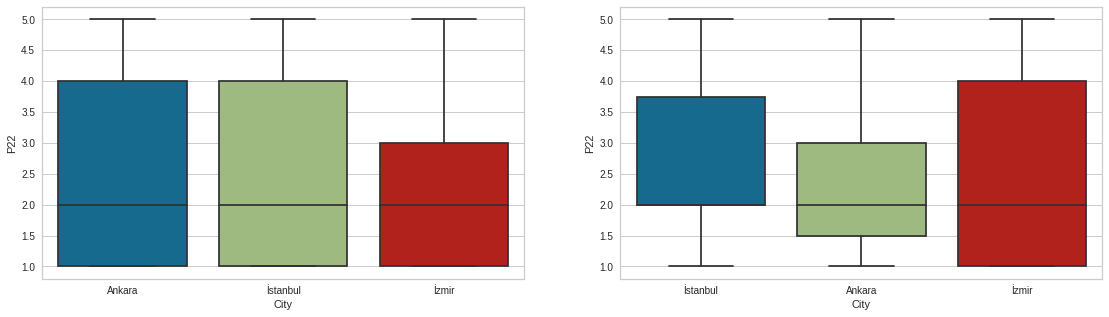

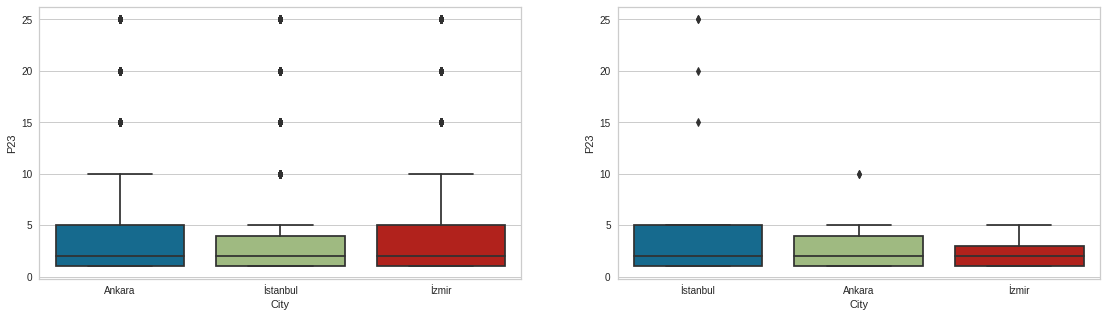

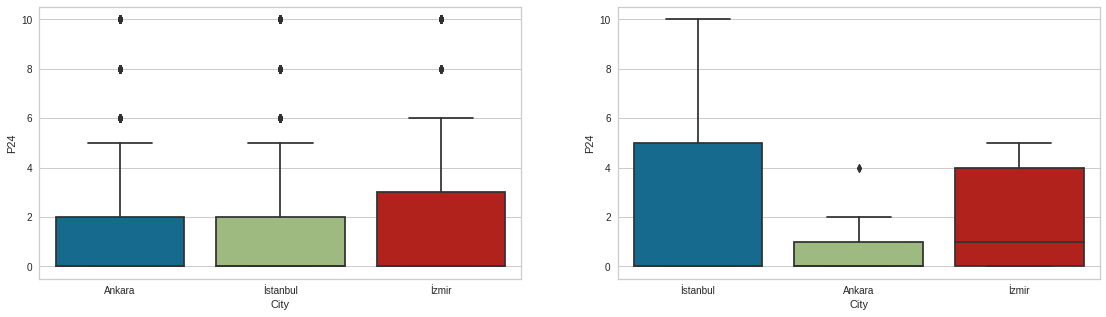

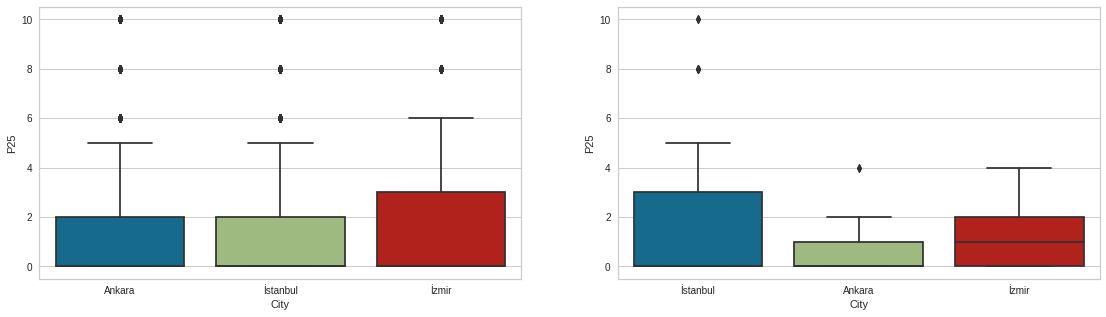

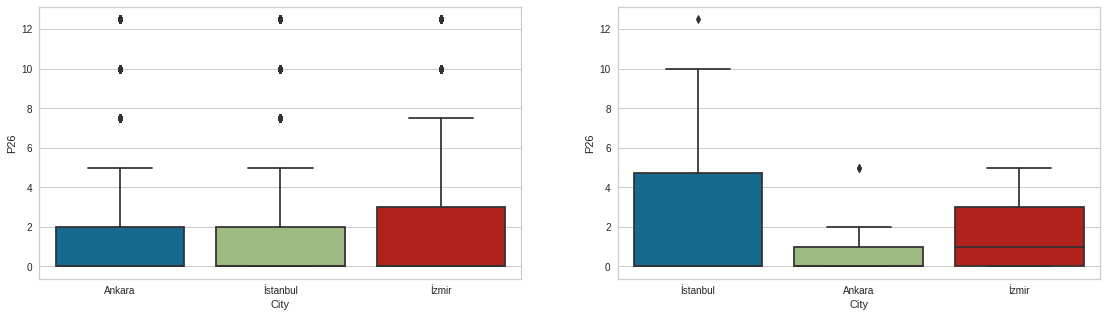

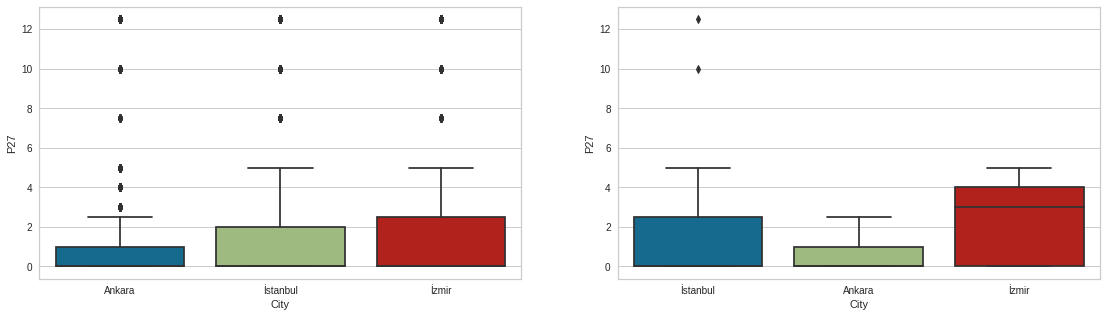

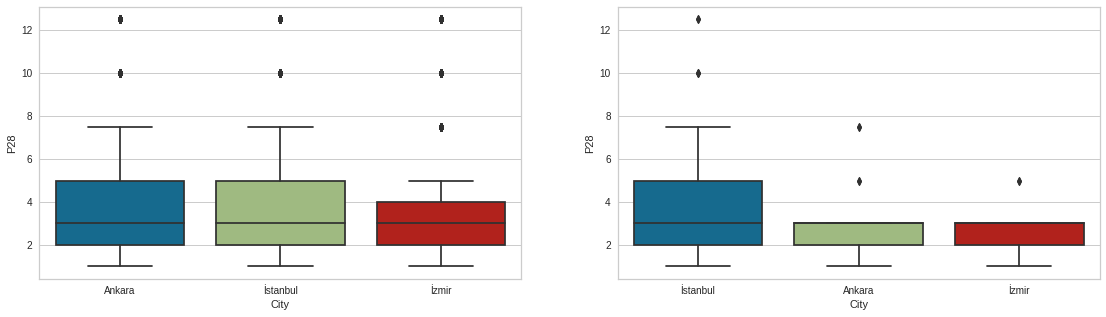

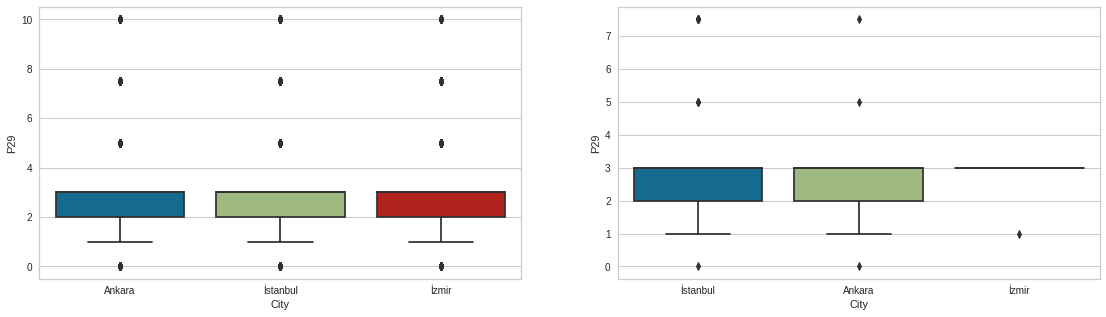

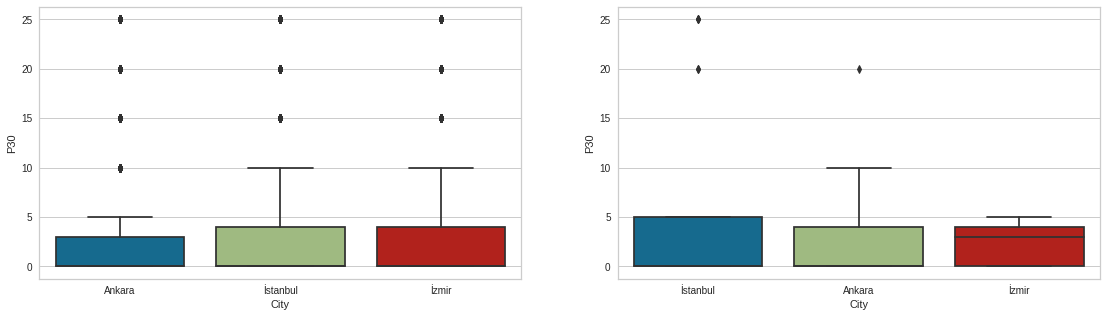

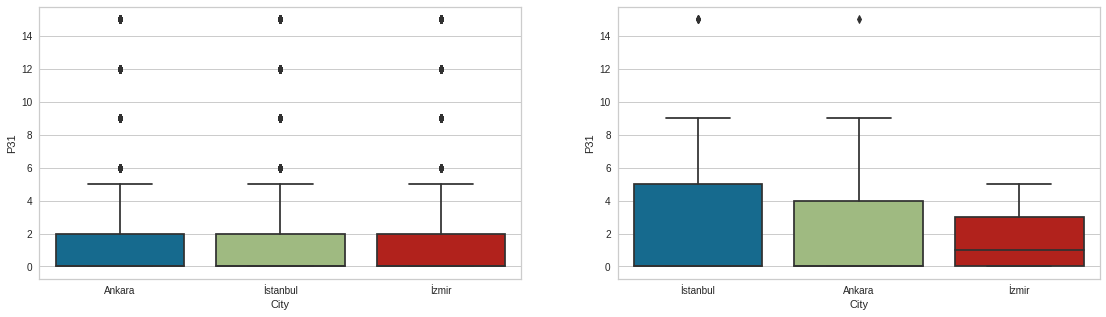

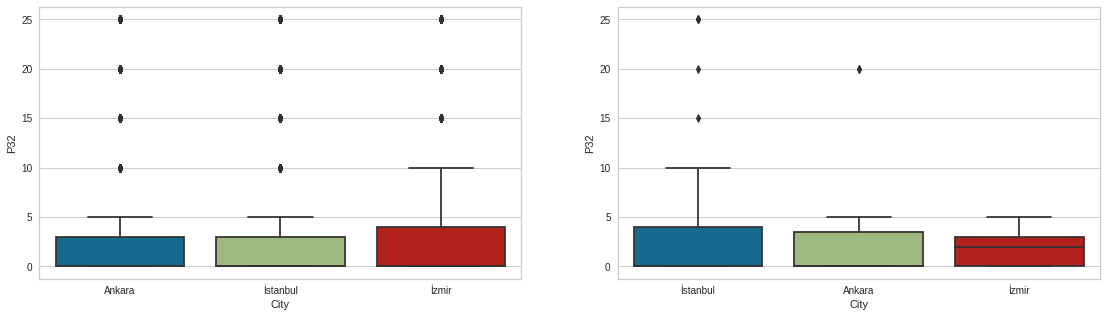

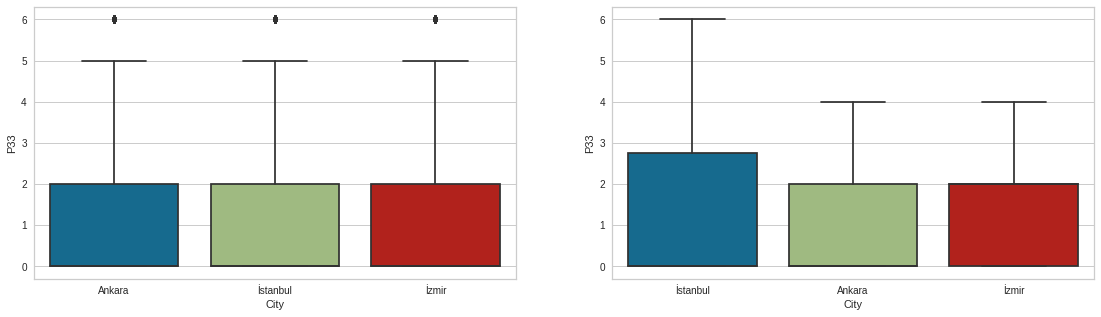

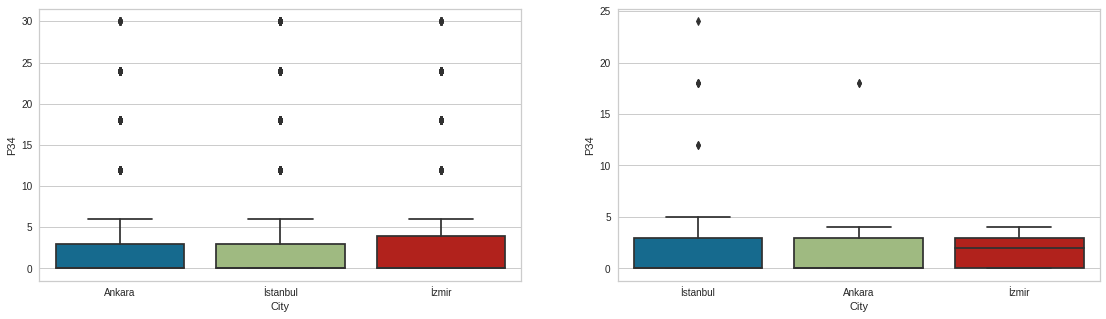

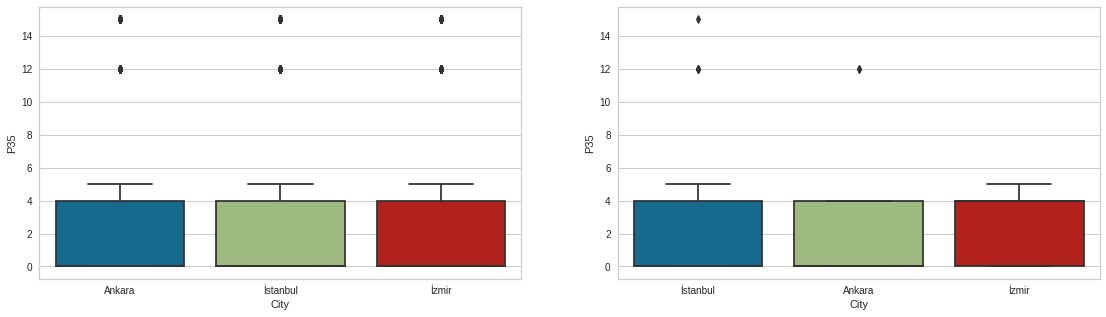

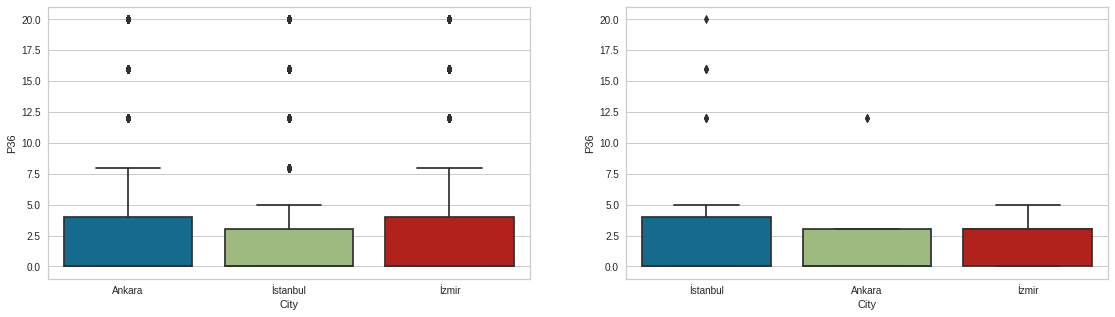

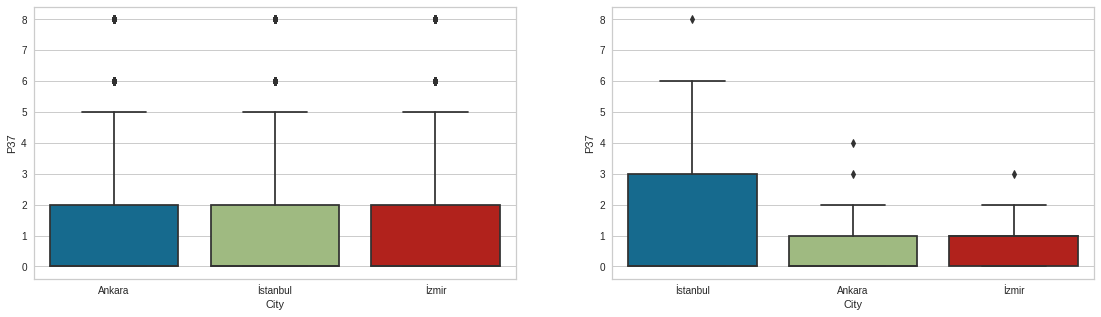

In [84]:
for i in cols_num:
  fig, ax = plt.subplots(1,2, figsize=(19, 5))
  g1 = sns.boxplot(data = df_test[df_test["City Group"] == 'Big Cities'], x = "City", y = i, showfliers = True, ax=ax[0])
  g2 = sns.boxplot(data = df_train[df_train["City Group"] == 'Big Cities'], x = "City", y = i, showfliers = True, ax=ax[1])
  fig.show()

* P1, P2 - P37 seem to have a non-linear relationship with revenue. A linear model will hardly capture their correlation.

### Multivariate

#### Corelation plot

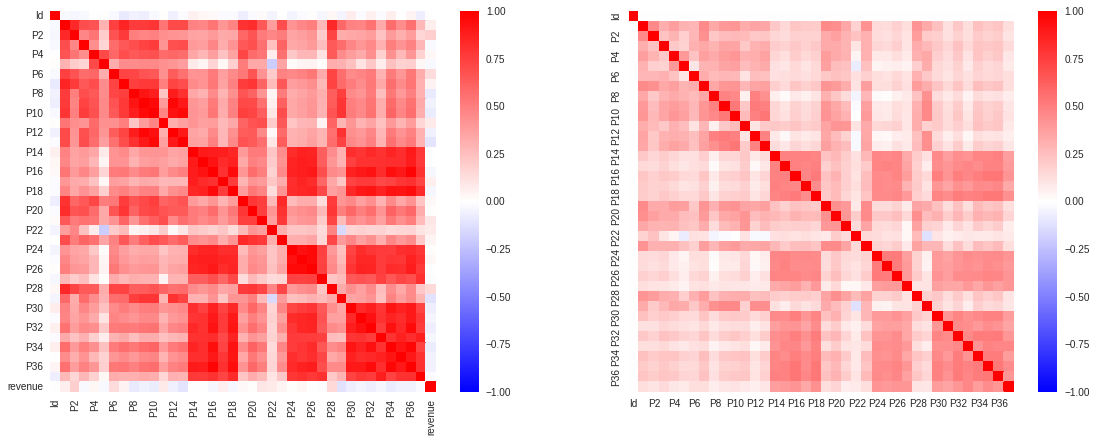

In [85]:
fig, ax = plt.subplots(1,2, figsize=(19, 7))
g1 = sns.heatmap(data = df_train.corr(), vmin = -1, vmax = 1, annot = False, cmap ='bwr', ax = ax[0]);
g2 = sns.heatmap(data = df_test.corr(), vmin = -1, vmax = 1, annot = False, cmap ='bwr', ax = ax[1]);
fig.show()

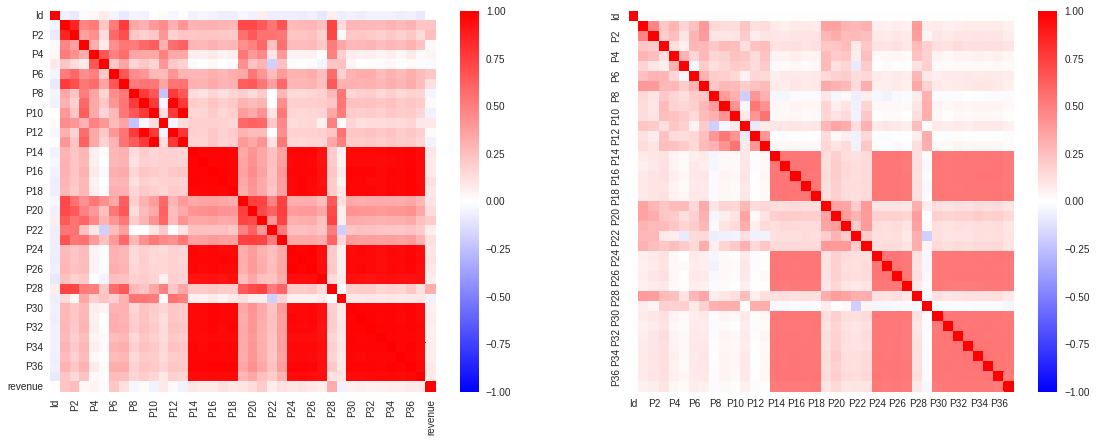

In [86]:
fig, ax = plt.subplots(1,2, figsize=(19, 7))
g1 = sns.heatmap(data = df_train.corr(method = "spearman"), vmin = -1, vmax = 1, annot = False, cmap ='bwr', ax=ax[0]);
g2 = sns.heatmap(data = df_test.corr(method = "spearman"), vmin = -1, vmax = 1, annot = False, cmap ='bwr', ax=ax[1]);
fig.show()

### Data Preparation

In [87]:
df_merged = pd.concat([df_test, df_train], axis=0, ignore_index=True).copy()
df_merged.shape

(100137, 43)

In [88]:
df_merged.isna().sum()

Id                 0
Open Date          0
City               0
City Group         0
Type               0
P1                 0
P2                 0
P3                 0
P4                 0
P5                 0
P6                 0
P7                 0
P8                 0
P9                 0
P10                0
P11                0
P12                0
P13                0
P14                0
P15                0
P16                0
P17                0
P18                0
P19                0
P20                0
P21                0
P22                0
P23                0
P24                0
P25                0
P26                0
P27                0
P28                0
P29                0
P30                0
P31                0
P32                0
P33                0
P34                0
P35                0
P36                0
P37                0
revenue       100000
dtype: int64

#### Standardization

In [89]:
features = list(df_merged.drop(columns=["Id", "revenue", "Open Date", "City", "City Group", "Type"]))


In [90]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100137 entries, 0 to 100136
Data columns (total 43 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Id          100137 non-null  int64         
 1   Open Date   100137 non-null  datetime64[ns]
 2   City        100137 non-null  object        
 3   City Group  100137 non-null  object        
 4   Type        100137 non-null  object        
 5   P1          100137 non-null  int64         
 6   P2          100137 non-null  float64       
 7   P3          100137 non-null  float64       
 8   P4          100137 non-null  float64       
 9   P5          100137 non-null  int64         
 10  P6          100137 non-null  int64         
 11  P7          100137 non-null  int64         
 12  P8          100137 non-null  int64         
 13  P9          100137 non-null  int64         
 14  P10         100137 non-null  int64         
 15  P11         100137 non-null  int64         
 16  P1

In [ ]:
# Z-score
df_merged[features]=StandardScaler().fit_transform(df_merged[features])

### Dimensionality Reduction

In [93]:
# Reducing data dimentionality
pca = PCA(n_components = 5).fit(df_merged[features])
reduced_data = pca.transform(df_merged[features])

reduced_data[0:10, 0:10]

array([[-5.40908056e+00,  2.55763177e+00,  4.25013904e-01,
         3.10637418e-01,  9.97410359e-01],
       [-6.66776745e+00,  1.65451734e+00, -1.75513504e+00,
         1.35606476e-01, -5.44267939e-01],
       [-4.78836549e+00,  3.86914602e+00,  1.56336047e+00,
         4.88750279e-01,  2.82041313e-01],
       [-5.46235504e+00,  2.99173007e-01, -6.71557298e-01,
        -4.53798127e-02, -1.61782969e-02],
       [-7.69767093e+00, -2.98375507e-01,  1.09548727e+00,
         7.67226066e-01, -2.30288484e+00],
       [-5.50488601e+00,  2.56701616e+00,  2.34209002e+00,
         1.01913896e+00, -2.53458572e+00],
       [-1.33151153e+00, -7.52691382e-01, -6.62970017e-01,
        -6.14973871e-01,  3.91585728e-01],
       [-1.25650667e+00, -1.49758591e+00, -8.54932601e-01,
        -1.14114858e-01,  1.59217328e+00],
       [-1.69252722e+00, -2.72962305e+00,  2.46732445e-02,
         1.86695405e+00, -1.05744459e+00],
       [ 2.78316452e+01,  4.33600515e+00, -1.26413907e+01,
         4.14613931e+00

In [94]:
len(reduced_data)

100137

In [95]:
features

['P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9',
 'P10',
 'P11',
 'P12',
 'P13',
 'P14',
 'P15',
 'P16',
 'P17',
 'P18',
 'P19',
 'P20',
 'P21',
 'P22',
 'P23',
 'P24',
 'P25',
 'P26',
 'P27',
 'P28',
 'P29',
 'P30',
 'P31',
 'P32',
 'P33',
 'P34',
 'P35',
 'P36',
 'P37']

Text(0, 0.5, 'PCA2')

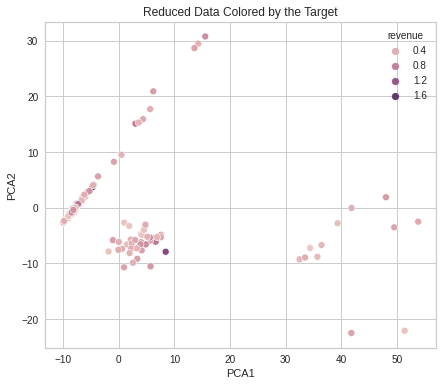

In [96]:
plt.figure(figsize = (7,6))
sns.scatterplot(x = reduced_data[:, 0], y = reduced_data[:, 1], hue = df_merged["revenue"])
plt.title("Reduced Data Colored by the Target")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

In [97]:
df_merged

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,2011-01-22,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,NaN
1,1,2011-03-18,Konya,Other,IL,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,NaN
2,2,2013-10-30,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,NaN
3,3,2013-05-06,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,3.0,0,4,0,0,0,0,0,0,NaN
4,4,2013-07-31,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100132,132,2008-06-25,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
100133,133,2006-10-12,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
100134,134,2006-07-08,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
100135,135,2010-10-29,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [98]:
df_training = df_merged[df_merged['revenue'].notna()].copy()
df_testing = df_merged[df_merged['revenue'].isna()].copy()


## Clustering

In [99]:
pca = PCA(n_components = 5).fit(df_training[features])
reduced_data = pca.transform(df_training[features])

reduced_data[0:10, 0:10]

array([[  3.52031779,  -3.80206836,  -1.1161187 ,   1.88368521,
          0.79527481],
       [ -8.21773866,   0.52964679,   1.09304585,  -0.13491588,
          0.45415939],
       [ -9.5620202 ,  -1.9479145 ,   1.64797678,   1.19608492,
          0.17097177],
       [ 38.8482949 ,   2.24944478,  -1.33026029,  14.69746714,
          0.4327584 ],
       [  0.50724873,  -6.80291212,   0.40625   ,   0.97342481,
          1.0110498 ],
       [ -1.99326667,  10.22265797,   6.1609813 ,  -1.78117464,
         -3.80097855],
       [  3.65888062,  -8.28903387,   0.17592484,  -2.90774575,
          0.74591482],
       [ -7.6908653 ,   1.35234894,  -1.31659134,  -1.24849422,
         -1.57289545],
       [  1.57787936, -10.39861649,  -0.18571449,   1.18209197,
          2.93190757],
       [  2.59165884,  21.1273573 ,   2.33988171,   4.10528187,
         11.74446054]])

### Gaussian Mixture

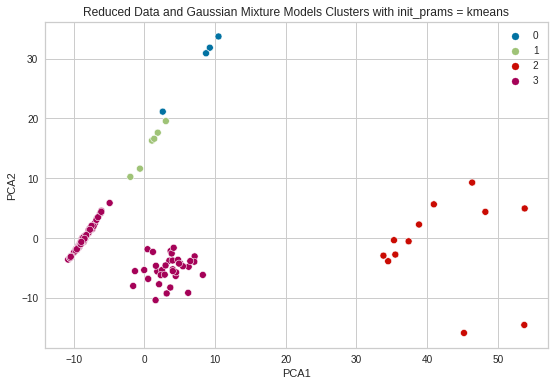

In [100]:
# Training Model
init = "kmeans"

model_gmm = GaussianMixture(
    n_components = 4, 
    n_init = 1,
    init_params = init,
    random_state = 10
).fit(df_training[features])

# Computing predictions
gmm_clusters = model_gmm.predict(df_training[features])

# Plotting predictions
plt.figure(figsize = (9,6))
sns.scatterplot(x = reduced_data[:, 0], y = reduced_data[:, 1], hue = pd.Categorical(gmm_clusters))
plt.title(f"Reduced Data and Gaussian Mixture Models Clusters with init_prams = {init}")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()


## Cluster Profiling 

In [110]:
df_training["Clusters"] = gmm_clusters

cluster_profile = df_training.groupby("Clusters").mean()

cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,38.250000,9.750000,6.375000,6.375000,6.375000,4.000000,5.500000,10.000000,8.500000,9.500000,10.000000,6.000000,9.500000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,12.000000,7.500000,2.750000,18.750000,0.000000,0.000000,0.000000,0.000000,8.125000,4.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5231010.500000
1,45.333333,9.500000,6.750000,5.750000,6.000000,3.666667,7.666667,10.000000,9.333333,9.000000,8.666667,5.000000,9.000000,6.500000,0.000000,0.000000,0.000000,0.000000,0.000000,11.666667,9.500000,3.000000,2.333333,5.833333,0.000000,0.000000,0.000000,0.000000,6.666667,6.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4855619.000000
2,79.583333,10.000000,6.500000,6.125000,6.125000,3.166667,7.333333,10.000000,8.833333,9.333333,9.500000,6.000000,9.000000,7.125000,8.000000,6.833333,11.750000,5.000000,10.750000,14.166667,12.250000,5.750000,2.666667,10.833333,6.166667,6.000000,7.708333,4.583333,7.291667,6.041667,17.916667,10.750000,17.500000,4.500000,18.000000,10.750000,14.333333,4.500000,3655949.083333
3,69.008696,2.904348,4.000000,3.982609,4.034783,1.730435,2.643478,4.547826,4.434783,4.713043,4.747826,2.791304,4.573913,4.708696,0.852174,0.939130,1.086957,0.713043,1.191304,2.886957,3.226087,1.686957,2.156522,1.991304,0.991304,0.817391,0.947826,0.886957,2.447826,2.604348,1.382609,1.191304,1.182609,0.886957,1.086957,1.295652,1.139130,0.860870,4488737.591304


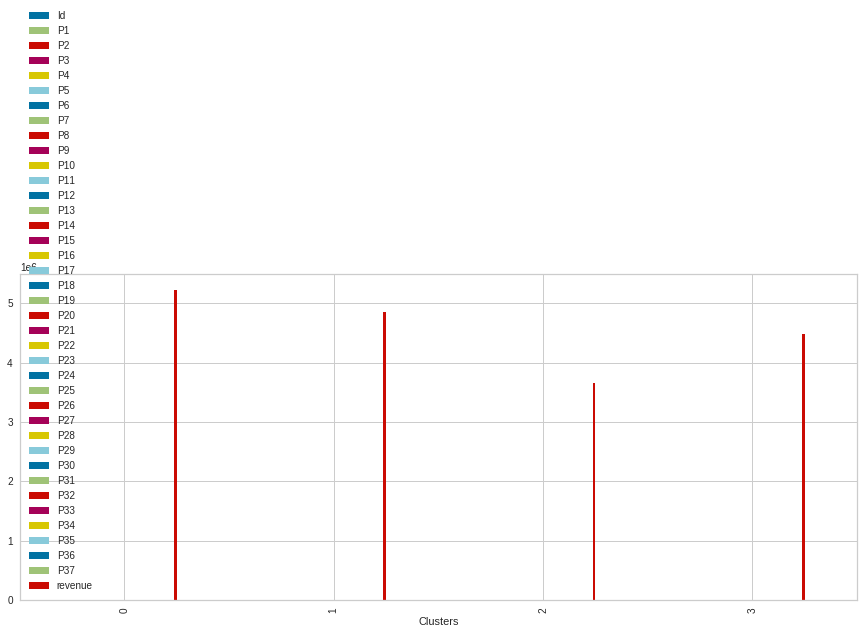

In [111]:
cluster_profile.plot.bar(figsize=(15, 6))

### DBSCAN

Text(0, 0.5, 'PCA2')

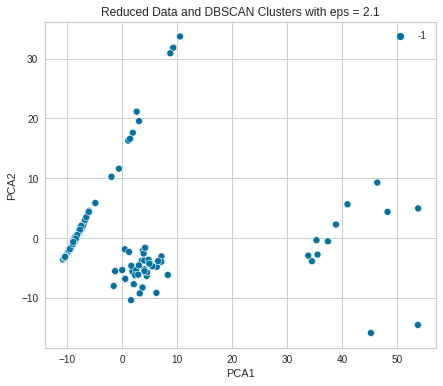

In [104]:
# Training Model
eps = 2.1
model_db = DBSCAN(eps = eps, min_samples = 5).fit(df_training[features])

# Plotting predictions
plt.figure(figsize = (7,6))
sns.scatterplot(x = reduced_data[:, 0], y = reduced_data[:, 1], hue = pd.Categorical(model_db.labels_))
plt.title(f"Reduced Data and DBSCAN Clusters with eps = {eps}")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

Text(0, 0.5, 'PCA2')

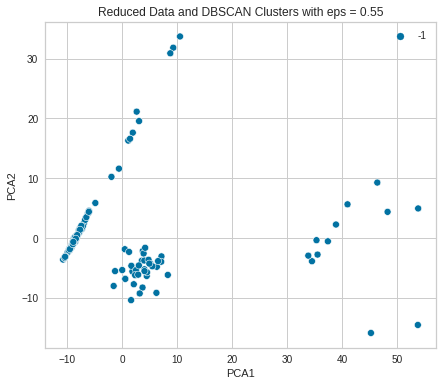

In [105]:
# Training Model
eps = 0.55
model_db = DBSCAN(eps = eps, min_samples = 5).fit(reduced_data)

# Plotting predictions
plt.figure(figsize = (7,6))
sns.scatterplot(x = reduced_data[:, 0], y = reduced_data[:, 1], hue = pd.Categorical(model_db.labels_))
plt.title(f"Reduced Data and DBSCAN Clusters with eps = {eps}")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

### OPTICS

Text(0, 0.5, 'PCA2')

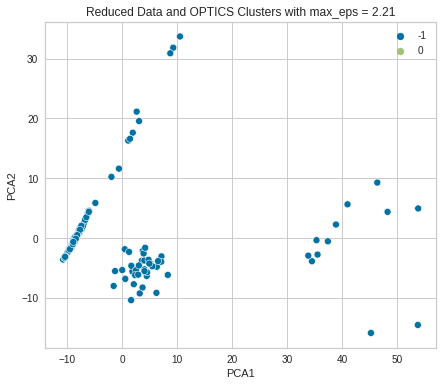

In [106]:
# Training Model
eps = 2.21
xi = 0.5
model_op = OPTICS(max_eps = eps, min_samples = 3, xi = xi).fit(df_training[features])

# Plotting predictions
plt.figure(figsize = (7,6))
sns.scatterplot(x = reduced_data[:, 0], y = reduced_data[:, 1], hue = pd.Categorical(model_op.labels_))
plt.title(f"Reduced Data and OPTICS Clusters with max_eps = {eps}")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

Text(0, 0.5, 'PCA2')

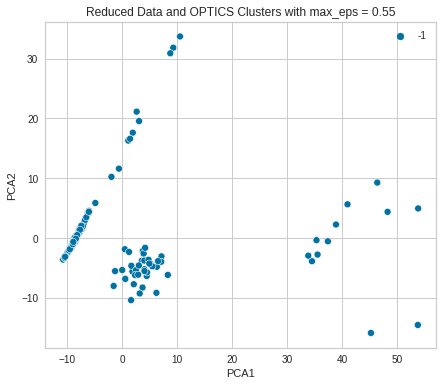

In [107]:
# Training Model
eps = 0.55
xi = 0.5
model_op = OPTICS(max_eps = eps, min_samples = 5, xi = xi).fit(reduced_data)

# Plotting predictions
plt.figure(figsize = (7,6))
sns.scatterplot(x = reduced_data[:, 0], y = reduced_data[:, 1], hue = pd.Categorical(model_op.labels_))
plt.title(f"Reduced Data and OPTICS Clusters with max_eps = {eps}")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

### K-Means

In [112]:
model_kmeans_1 = KMeans(n_clusters = 5, random_state = 10).fit(df_training[features])

In [113]:
model_kmeans_1.labels_

array([2, 0, 0, 4, 2, 0, 2, 0, 2, 3, 3, 2, 0, 0, 0, 4, 0, 0, 2, 0, 2, 0,
       3, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 3, 0,
       2, 3, 2, 2, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 2, 0, 4, 0,
       0, 0, 2, 0, 0, 4, 2, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 3, 0, 3, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       4, 0, 2, 0, 2, 4, 0, 2, 4, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int32)

In [114]:
df_training["cluster-kmeans-5"] = pd.Categorical(model_kmeans_1.labels_)

df_training

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P31,P32,P33,P34,P35,P36,P37,revenue,Clusters,cluster-kmeans-5
100000,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3,4,5,5,4,3,4,5653753.0,3,2
100001,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,6923131.0,3,0
100002,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,2055379.0,3,0
100003,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,12,10,6,18,12,12,6,2675511.0,2,4
100004,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,1,3,2,3,4,3,3,4316715.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100132,132,2008-06-25,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,0,0,0,0,0,0,0,5787594.0,3,0
100133,133,2006-10-12,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,0,0,0,0,0,0,0,9262754.0,3,0
100134,134,2006-07-08,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,0,0,0,0,0,0,0,2544857.0,3,0
100135,135,2010-10-29,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,0,0,0,0,0,0,0,7217634.0,3,0


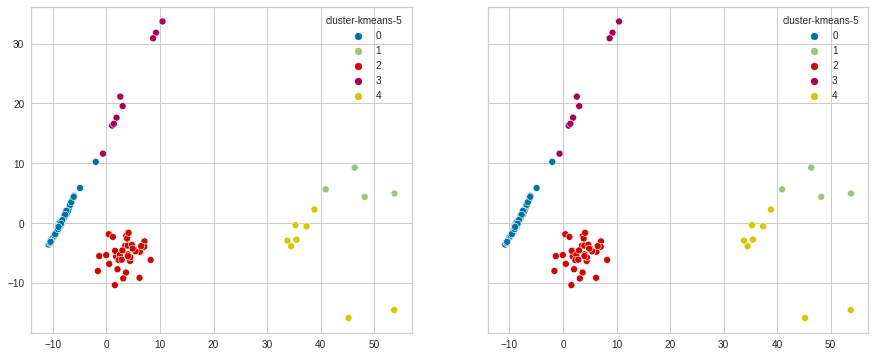

In [125]:
# Figure canvas
fig, ax = plt.subplots(ncols = 2, nrows = 1, sharey = True, figsize = (15, 6))

# Plotting original classes
sns.scatterplot(data = df_training, x = reduced_data[:, 0], y = reduced_data[:, 1], hue = "cluster-kmeans-5", ax = ax[0])

# Plotting clusters
sns.scatterplot(data = df_training, x = reduced_data[:, 0], y = reduced_data[:, 1], hue = "cluster-kmeans-5", ax = ax[1]);

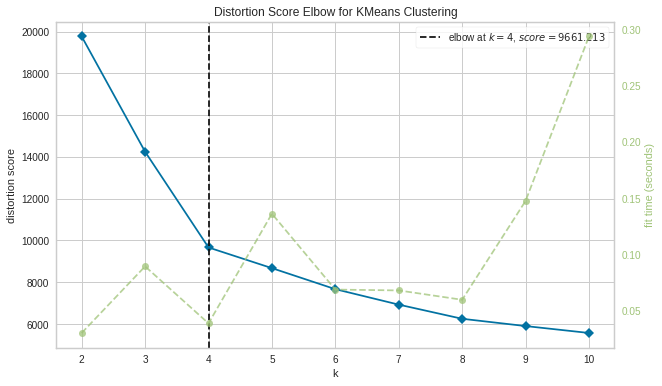

In [128]:
plt.figure(figsize = (10,6))
kelbow_visualizer(model_kmeans_1, X = df_training[features], y = df_training[features]);

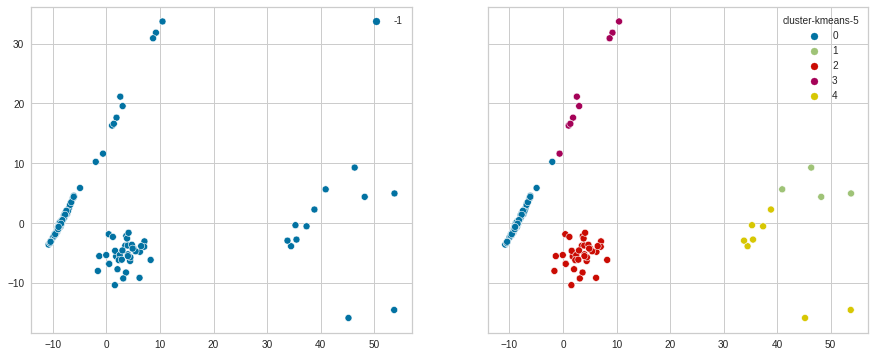

In [133]:
# Training model
model_kmeans_2 = KMeans(n_clusters = 5, random_state = 10).fit(df_training[features])

# Plotting clusters
df_training["cluster-kmeans-5"] = pd.Categorical(model_kmeans_2.labels_)

fig, ax = plt.subplots(ncols = 2, nrows = 1, sharey = True, figsize = (15, 6))
sns.scatterplot(data = df_training, x = reduced_data[:, 0], y = reduced_data[:, 1], hue = pd.Categorical(model_db.labels_), ax = ax[0])
sns.scatterplot(data = df_training, x = reduced_data[:, 0], y = reduced_data[:, 1], hue = "cluster-kmeans-5", ax = ax[1]);

### Hierarchical Clustering

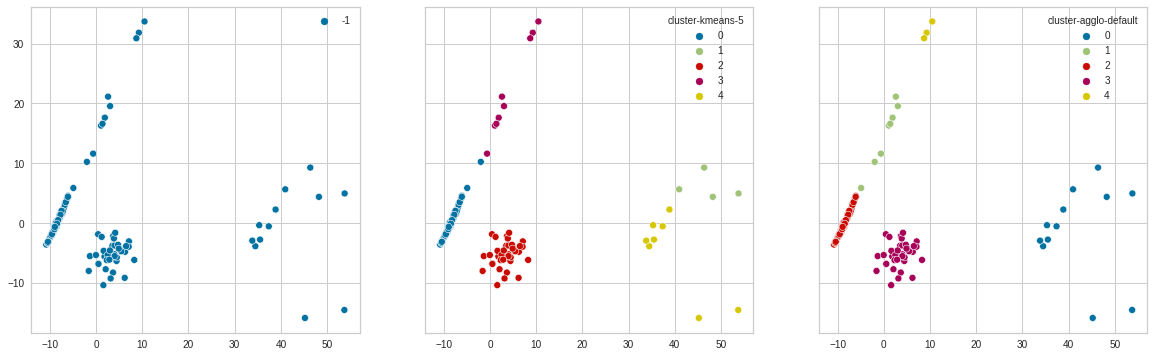

In [138]:
# Training model
model_aggl_1 = AgglomerativeClustering(n_clusters = 5).fit(df_training[features])

# Plotting clusters
df_training["cluster-agglo-default"] = pd.Categorical(model_aggl_1.labels_)

fig, ax = plt.subplots(ncols = 3, nrows = 1, sharey = True, figsize = (20, 6))
sns.scatterplot(data = df_training, x = reduced_data[:, 0], y = reduced_data[:, 1], hue = pd.Categorical(model_db.labels_), ax = ax[0])
sns.scatterplot(data = df_training, x = reduced_data[:, 0], y = reduced_data[:, 1], hue = "cluster-kmeans-5", ax = ax[1])
sns.scatterplot(data = df_training, x = reduced_data[:, 0], y = reduced_data[:, 1], hue = "cluster-agglo-default", ax = ax[2]);

In [141]:
# Distance metrics
distances = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# Linkage methods
linkages = ["single", "complete", "average", "weighted"]

# Data Frame for the correlations
coph = pd.DataFrame(columns = ["Distance", "Linkage", "Cophenetic"])

i = 0
# Loop over metrics
for d in distances:

    # Loop over linkages
    for l in linkages:

        # Simple heirarchical clustering
        Z = linkage(df_training[features], metric = d, method = l)

        # Cophenetic correlation
        c, coph_dists = cophenet(Z, pdist(df_training[features]))

        coph.loc[i,:] = [d.capitalize(), l.capitalize(), c]

        i = i + 1
        
coph.sort_values("Cophenetic", ascending = False)

,Distance,Linkage,Cophenetic
2,Euclidean,Average,0.970132
1,Euclidean,Complete,0.965429
3,Euclidean,Weighted,0.957882
0,Euclidean,Single,0.955804
14,Cityblock,Average,0.952928
13,Cityblock,Complete,0.947002
4,Chebyshev,Single,0.940896
6,Chebyshev,Average,0.939249
12,Cityblock,Single,0.93178
7,Chebyshev,Weighted,0.929623


In [142]:
# Distance
d = "euclidean"

# Linkage methods
linkages = ["single", "complete", "average", "centroid", "ward", "weighted"]

# Data Frame for the correlations
coph = pd.DataFrame(columns = ["Distance", "Linkage", "Cophenetic"])

i = 0
# Loop over linkages
for l in linkages:

    # Simple heirarchical clustering
    Z = linkage(df_training[features], metric = d, method = l)

    # Cophenetic correlation
    c, coph_dists = cophenet(Z, pdist(df_training[features]))

    coph.loc[i,:] = [d.capitalize(), l.capitalize(), c]

    i = i + 1
        
coph.sort_values("Cophenetic", ascending = False)

,Distance,Linkage,Cophenetic
2,Euclidean,Average,0.970132
3,Euclidean,Centroid,0.969187
1,Euclidean,Complete,0.965429
5,Euclidean,Weighted,0.957882
0,Euclidean,Single,0.955804
4,Euclidean,Ward,0.914182


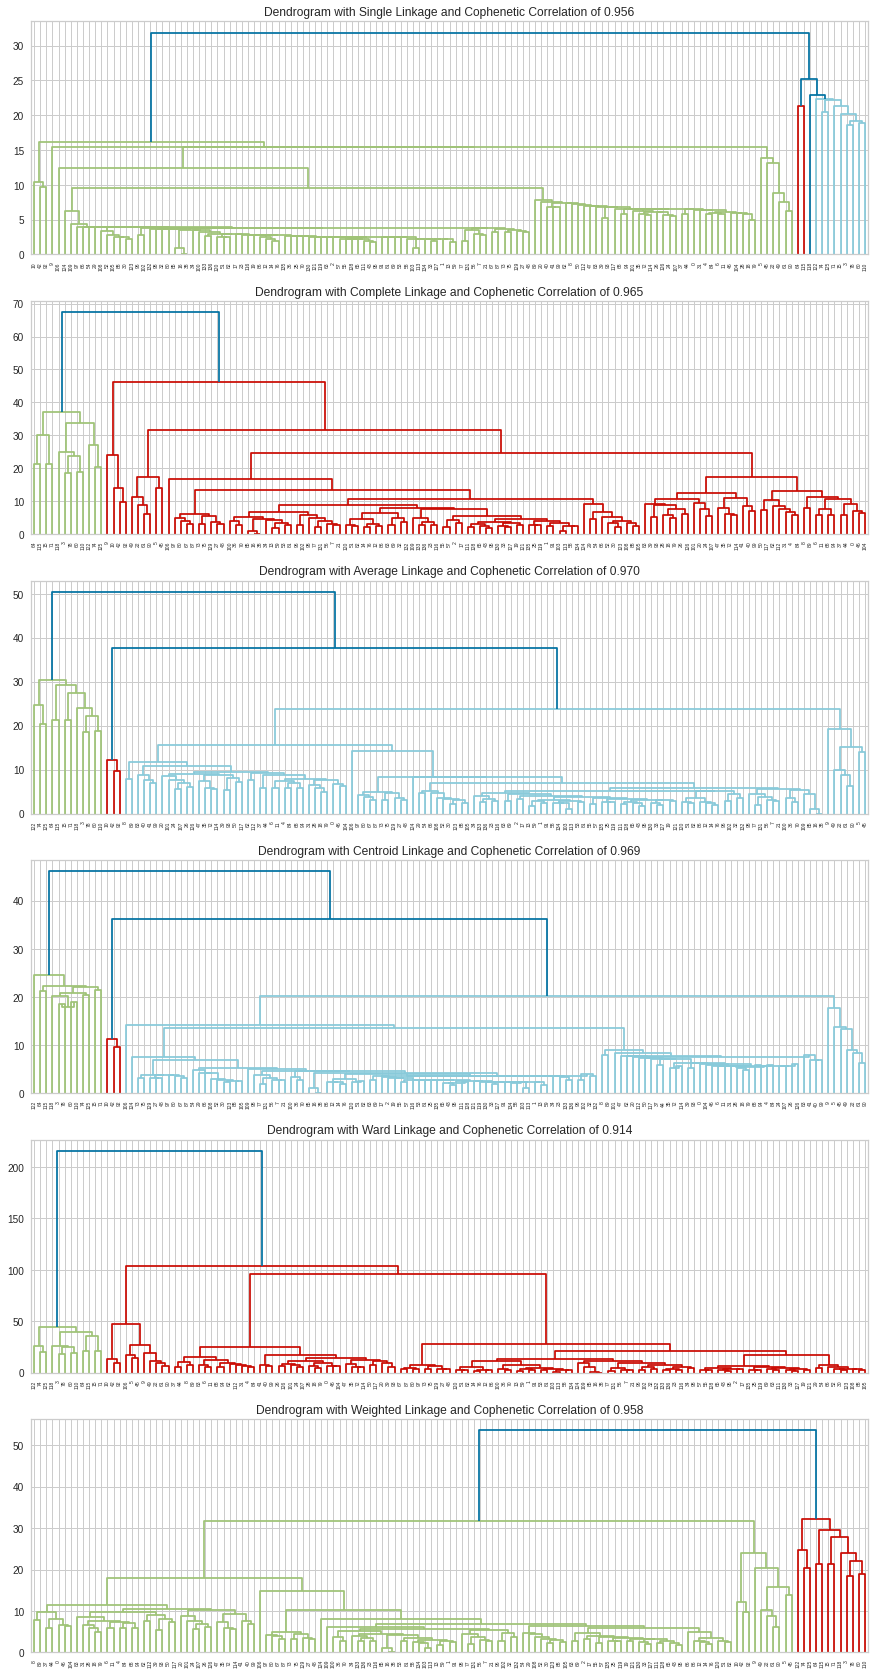

In [143]:
# Figure canvas and subplots
fig, axs = plt.subplots(len(linkages), 1, figsize=(15, 30))

# Loop over linkages
for i, method in enumerate(linkages):

    # Simple hierarchical clustering
    Z = linkage(df_training[features], metric = "euclidean", method = method)

    # Cophenetic correlation
    c, d = cophenet(Z, pdist(df_training[features]))

    # Plotting Dendrogram
    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram with {method.capitalize()} Linkage and Cophenetic Correlation of {c:0.3f}")

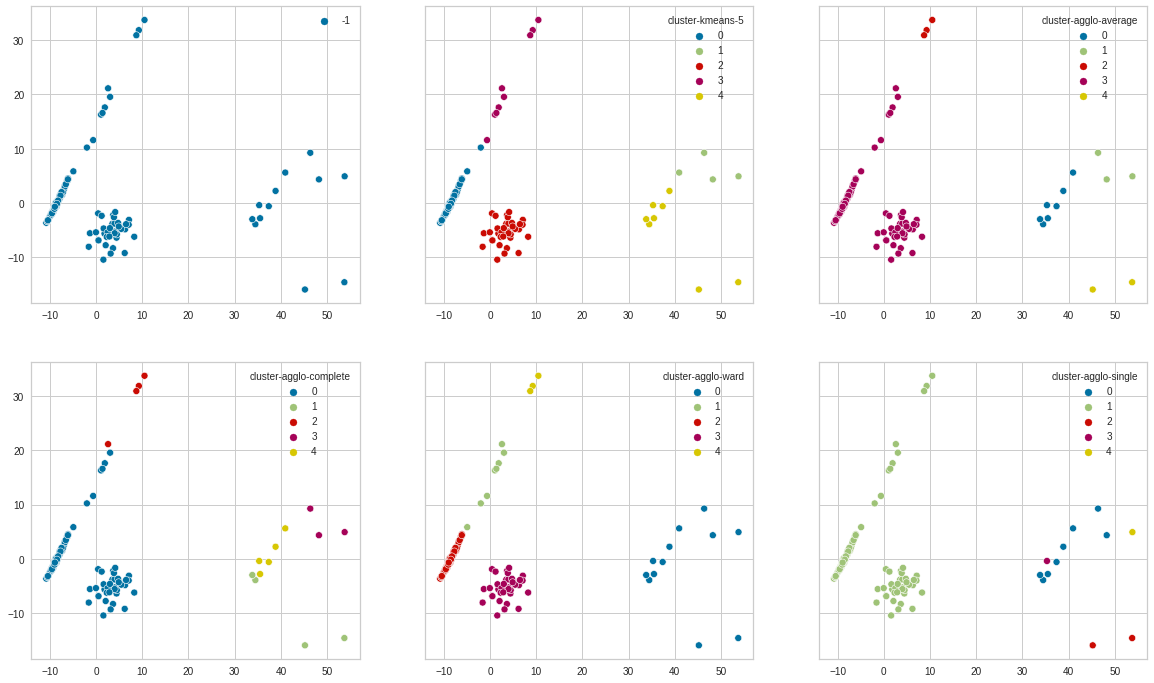

In [146]:
# Linkages for clustering
linkages = ["average", "complete", "ward", "single"]

# Plotting original and K-Means
fig, ax = plt.subplots(nrows = 2, ncols = 3, sharey = True, figsize = (20, 12))
sns.scatterplot(data = df_training, x = reduced_data[:, 0], y = reduced_data[:, 1], hue = pd.Categorical(model_db.labels_), ax = ax[0, 0])
sns.scatterplot(data = df_training, x = reduced_data[:, 0], y = reduced_data[:, 1], hue = "cluster-kmeans-5", ax = ax[0, 1])

i = 0
j = 2
for l in linkages:
    # Training model
    model_aggl = AgglomerativeClustering(n_clusters = 5, linkage = l).fit(df_training[features])

    # Plotting clusters
    name = "cluster-agglo-" + l
    df_training[name] = pd.Categorical(model_aggl.labels_)

    # Plotting Clusters
    sns.scatterplot(data = df_training, x = reduced_data[:, 0], y = reduced_data[:, 1], hue = name, ax = ax[i, j]);

    if j == 2:
        i = 1
        j = -1
    
    j = j + 1

In [147]:
## Cluster Profiling II

In [149]:
cluster_profile = df_training.groupby("cluster-agglo-default").mean()

cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Clusters
cluster-agglo-default,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,79.583333,10.000000,6.500000,6.125000,6.125000,3.166667,7.333333,10.000000,8.833333,9.333333,9.500000,6.000000,9.000000,7.125000,8.000000,6.833333,11.750000,5.000000,10.750000,14.166667,12.250000,5.750000,2.666667,10.833333,6.166667,6.000000,7.708333,4.583333,7.291667,6.041667,17.916667,10.750000,17.500000,4.500000,18.000000,10.750000,14.333333,4.500000,3655949.083333,2.000000
1,48.375000,8.250000,6.000000,5.812500,6.187500,4.000000,6.500000,9.000000,9.250000,9.250000,9.000000,4.750000,9.250000,6.750000,0.000000,0.000000,0.000000,0.000000,0.000000,12.500000,7.875000,3.000000,2.000000,6.250000,0.000000,0.000000,0.000000,0.000000,5.937500,6.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4933339.375000,1.125000
2,73.649351,2.792208,3.896104,3.883117,4.103896,1.779221,2.506494,4.467532,4.428571,4.649351,4.701299,2.753247,4.519481,4.675325,0.000000,0.000000,0.000000,0.000000,0.000000,2.597403,2.870130,1.493506,2.000000,1.636364,0.000000,0.000000,0.000000,0.000000,2.402597,2.584416,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4404471.116883,3.000000
3,58.351351,3.135135,4.243243,4.135135,3.837838,1.567568,2.945946,4.783784,4.351351,4.702703,4.702703,2.783784,4.540541,4.702703,2.648649,2.918919,3.378378,2.216216,3.702703,3.432432,3.972973,2.054054,2.513514,2.648649,3.081081,2.540541,2.945946,2.756757,2.540541,2.513514,4.297297,3.702703,3.675676,2.756757,3.378378,4.027027,3.540541,2.675676,4653291.162162,3.000000
4,48.000000,11.000000,7.000000,6.500000,6.000000,3.333333,6.000000,10.000000,8.000000,9.333333,10.000000,7.333333,9.333333,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,15.000000,9.000000,3.333333,21.666667,0.000000,0.000000,0.000000,0.000000,9.166667,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5159938.333333,0.000000


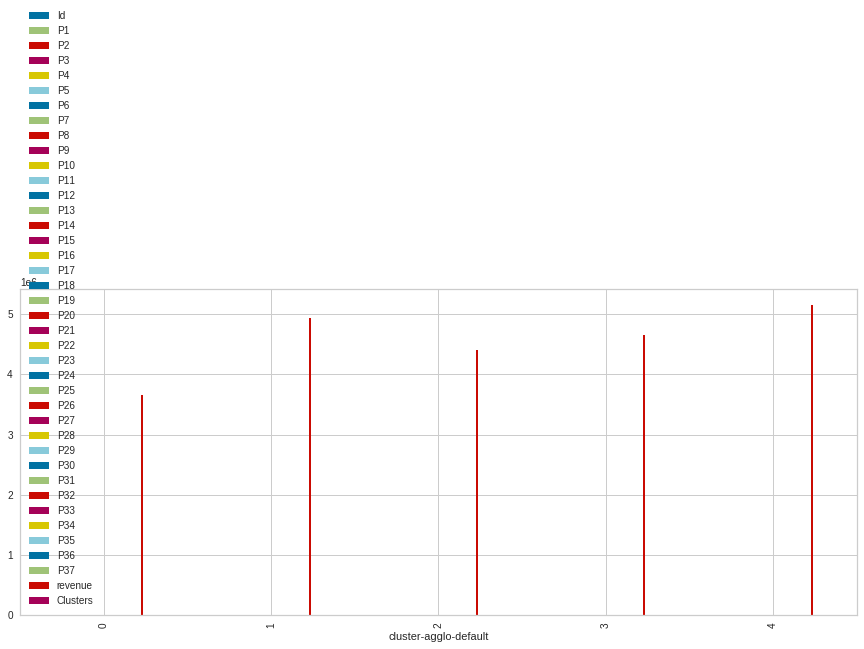

In [150]:
cluster_profile.plot.bar(figsize=(15, 6))